In [435]:
import pandas as pd  
import numpy as np     
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style
%matplotlib inline 
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix ,classification_report
from sklearn import metrics
from scipy.stats import zscore

# Problem 1: Linear Regression


You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.

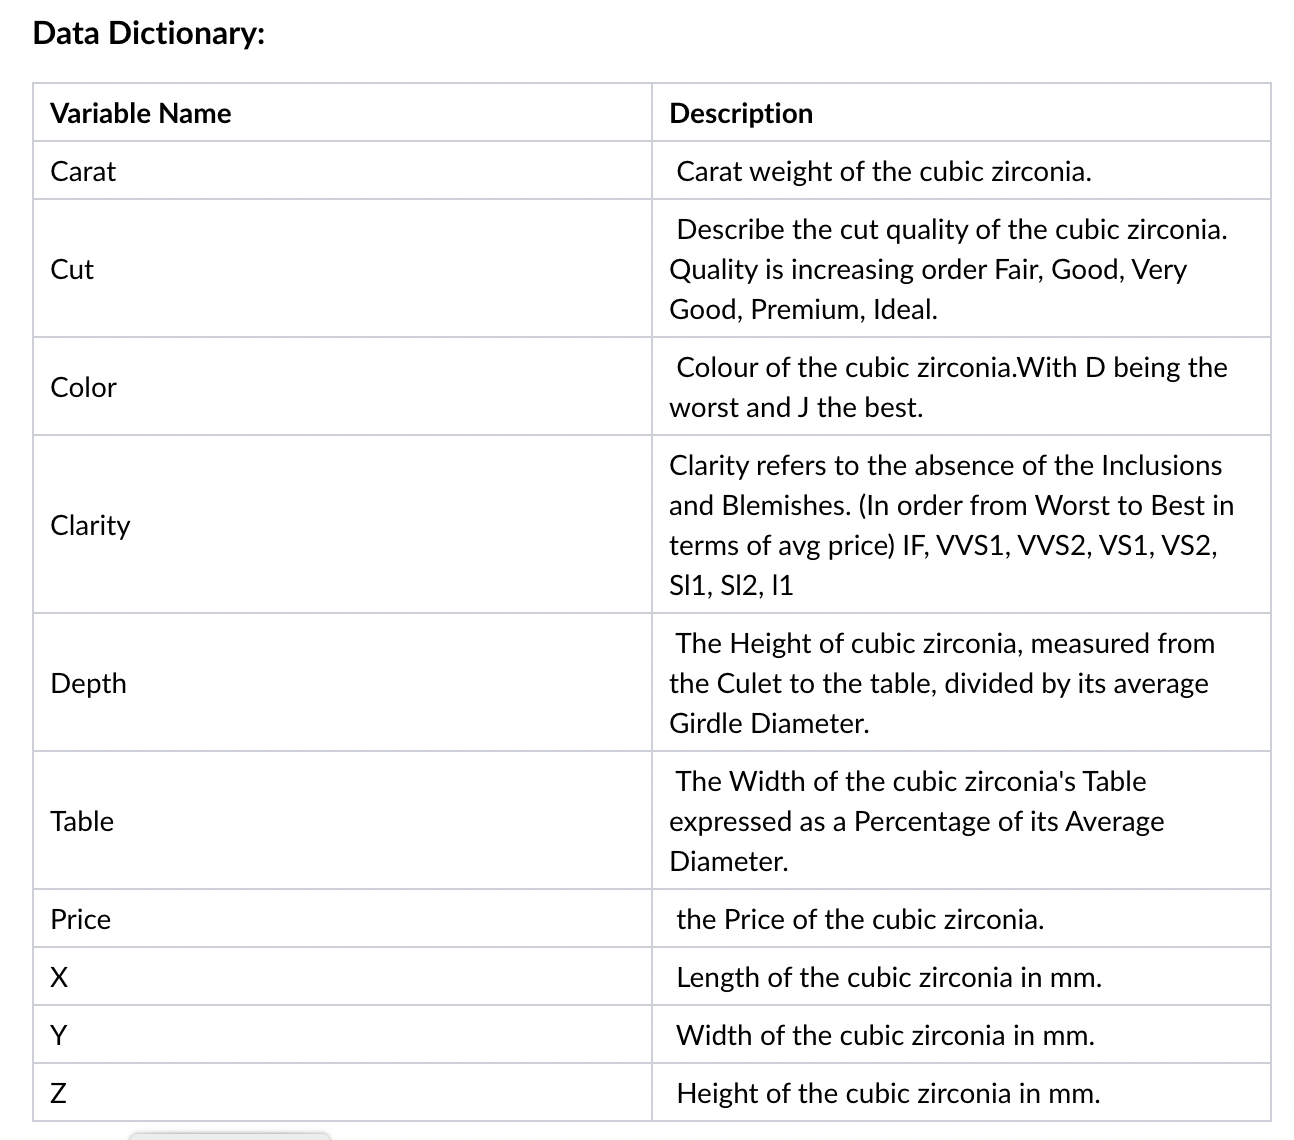

__1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA, duplicate values). Perform Univariate and Bivariate Analysis__


In [436]:
# reading the CSV file into pandas dataframe
df = pd.read_csv("cubic_zirconia.csv")

In [437]:
# Check top few records to get a feel of the data structure
df.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
5,6,1.02,Ideal,D,VS2,61.5,56.0,6.46,6.49,3.99,9502
6,7,1.01,Good,H,SI1,63.7,60.0,6.35,6.30,4.03,4836
7,8,0.50,Premium,E,SI1,61.5,62.0,5.09,5.06,3.12,1415
8,9,1.21,Good,H,SI1,63.8,64.0,6.72,6.63,4.26,5407
9,10,0.35,Ideal,F,VS2,60.5,57.0,4.52,4.60,2.76,706


In [438]:
df.shape

(26967, 11)

In [439]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [440]:
df.describe()

,Unnamed: 0,carat,depth,table,x,y,z,price
count,26967.000000,26967.000000,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,13484.000000,0.798375,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,7784.846691,0.477745,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,1.000000,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,6742.500000,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,13484.000000,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,20225.500000,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,26967.000000,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


In [441]:
df.dtypes  # Checking the type of the dataset.

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
x             float64
y             float64
z             float64
price           int64
dtype: object

__Inference from the Oberservation-1__
- The data set contains 26967 row, 11 columns .
- In the given data set there are 2 Integer type features,6 Float type features. 3 Object type features. Where 'price' is the target variable and all other are predector variable.
- The first column is an index ("Unnamed: 0")as this only serial no, we can remove it.
- Exept depth, in all the column non null count is 26967.

In [442]:
# drop the serial no column as it is useless for the model
lr_df = df.drop('Unnamed: 0', axis=1)

In [443]:
lr_df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [444]:
# Getting the summary statistics of the dataset
lr_df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26967.0,0.798375,0.477745,0.2,0.40,0.70,1.05,4.50
depth,26270.0,61.745147,1.412860,50.8,61.00,61.80,62.50,73.60
table,26967.0,57.456080,2.232068,49.0,56.00,57.00,59.00,79.00
x,26967.0,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,5.733569,1.166058,0.0,4.71,5.71,6.54,58.90
z,26967.0,3.538057,0.720624,0.0,2.90,3.52,4.04,31.80
price,26967.0,3939.518115,4024.864666,326.0,945.00,2375.00,5360.00,18818.00


In [445]:
# Getting the summary statistics of the  object variable.
lr_df.describe(include=['object'])

,cut,color,clarity
count,26967,26967,26967
unique,5,7,8
top,Ideal,G,SI1
freq,10816,5661,6571


In [446]:
# Checking for the values which are equal to zero.
print("Number of rows with x == 0: {} ".format((lr_df.x==0).sum()))
print("Number of rows with y == 0: {} ".format((lr_df.y==0).sum()))
print("Number of rows with z == 0: {} ".format((lr_df.z==0).sum()))
print("Number of rows with depth == 0: {} ".format((lr_df.depth==0).sum()))

Number of rows with x == 0: 3 
Number of rows with y == 0: 3 
Number of rows with z == 0: 9 
Number of rows with depth == 0: 0 


In [447]:
#Dropping dimentionless diamonds
lr_df = lr_df.drop(lr_df[lr_df["x"]==0].index)
lr_df = lr_df.drop(lr_df[lr_df["y"]==0].index)
lr_df = lr_df.drop(lr_df[lr_df["z"]==0].index)
lr_df.shape

(26958, 10)

__Inference from the Oberservation-2__
- On the given data set the mean and median values does not have much differenc.
- We can observe Min value of "x", "y", & "z" are zero this indicates that they are faulty values. 
- As we know dimensionless or 2-dimensional diamonds are not possible. So we need to filter out those as it clearly faulty data entries. 
- There are three object data type 'cut', 'color' and 'clarity'.

## Performing EDA : We will follow the below mentioned steps to perform EDA
Step 1 :Checking & Removing duplicates.

Step 2: Checking and treating Missing value.

Step 3: Outlier Treatment.

Step 4: Univariate Analysis.

Step 5: Bivariate Analysis.

__EDA-Step-1: Checking for duplicate records in the data__

In [448]:
dups = lr_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(lr_df.shape)

Number of duplicate rows = 33
(26958, 10)


In [449]:
print('Before',lr_df.shape)
lr_df.drop_duplicates(inplace=True) 
print('After',lr_df.shape)

Before (26958, 10)
After (26925, 10)


In [450]:
dups = lr_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


__EDA-Step 2: Checking Missing value__

In [451]:
# Are there any missing values ?
lr_df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

__Inference from the Oberservation-3__
- we can observe there are 697 missing value in the depth column
- Missing value treatment will be done in section 1.2.

__EDA-Step 3 : Outlier Checks.__

/Users/balask/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


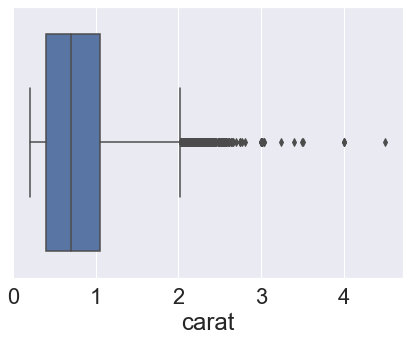

/Users/balask/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


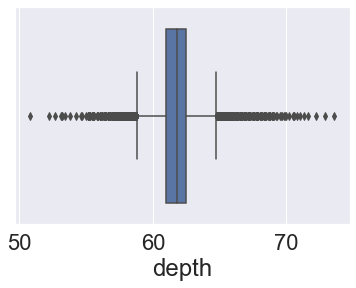

/Users/balask/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


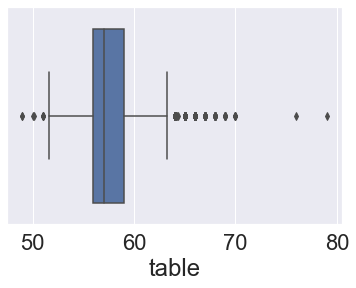

/Users/balask/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


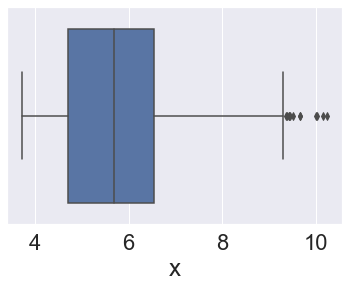

/Users/balask/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


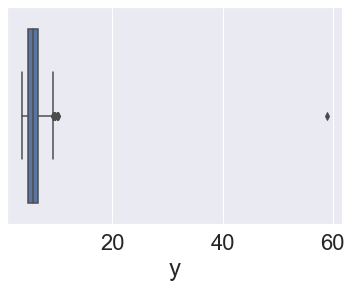

/Users/balask/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


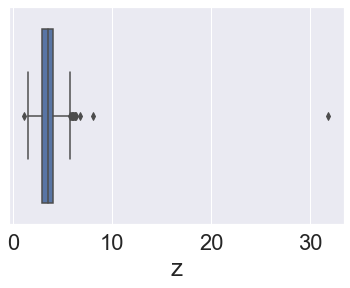

/Users/balask/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


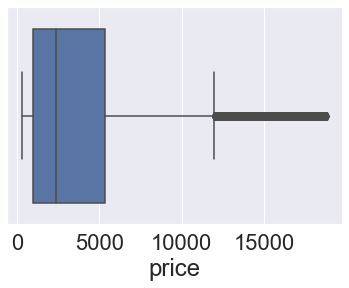

In [452]:
cols = ['carat','depth', 'table', 'x', 'y', 'z',
       'price' ]
plt.figure(figsize=(7,5))
for i in cols:
    sns.boxplot(lr_df[i],whis=1.5)
    plt.show();

In [453]:
### Outlier treatment :
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [454]:
for column in lr_df[cols].columns:
    lr,ur=remove_outlier(lr_df[column])
    lr_df[column]=np.where(lr_df[column]>ur,ur,lr_df[column])
    lr_df[column]=np.where(lr_df[column]<lr,lr,lr_df[column])

/Users/balask/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


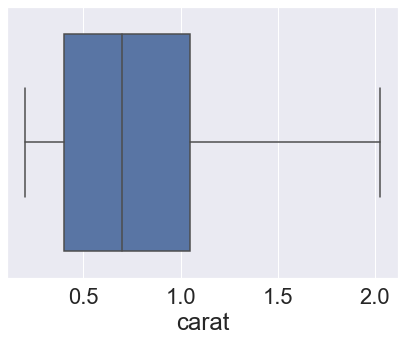

/Users/balask/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


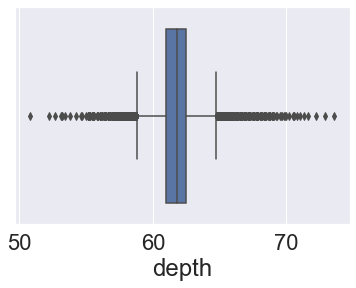

/Users/balask/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


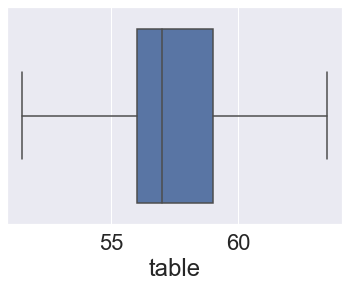

/Users/balask/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


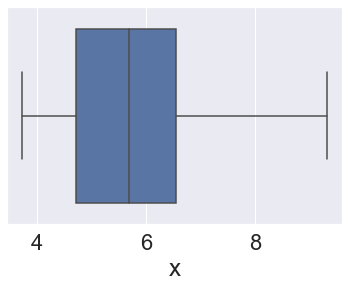

/Users/balask/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


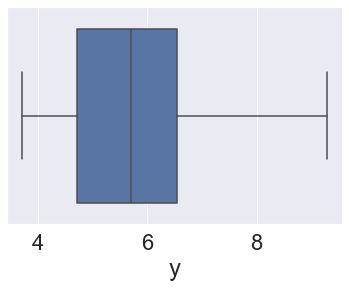

/Users/balask/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


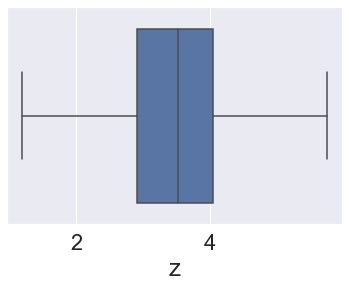

/Users/balask/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


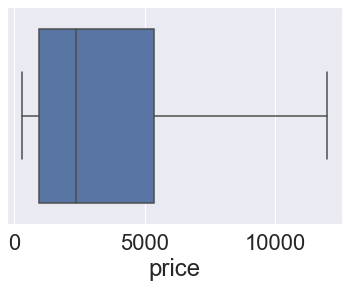

In [455]:
cols = ['carat','depth', 'table', 'x', 'y', 'z',
       'price' ]
plt.figure(figsize=(7,5))
for i in cols:
    sns.boxplot(lr_df[i],whis=1.5)
    plt.show();

__EDA-Step 4 : Univariate Analysis.__

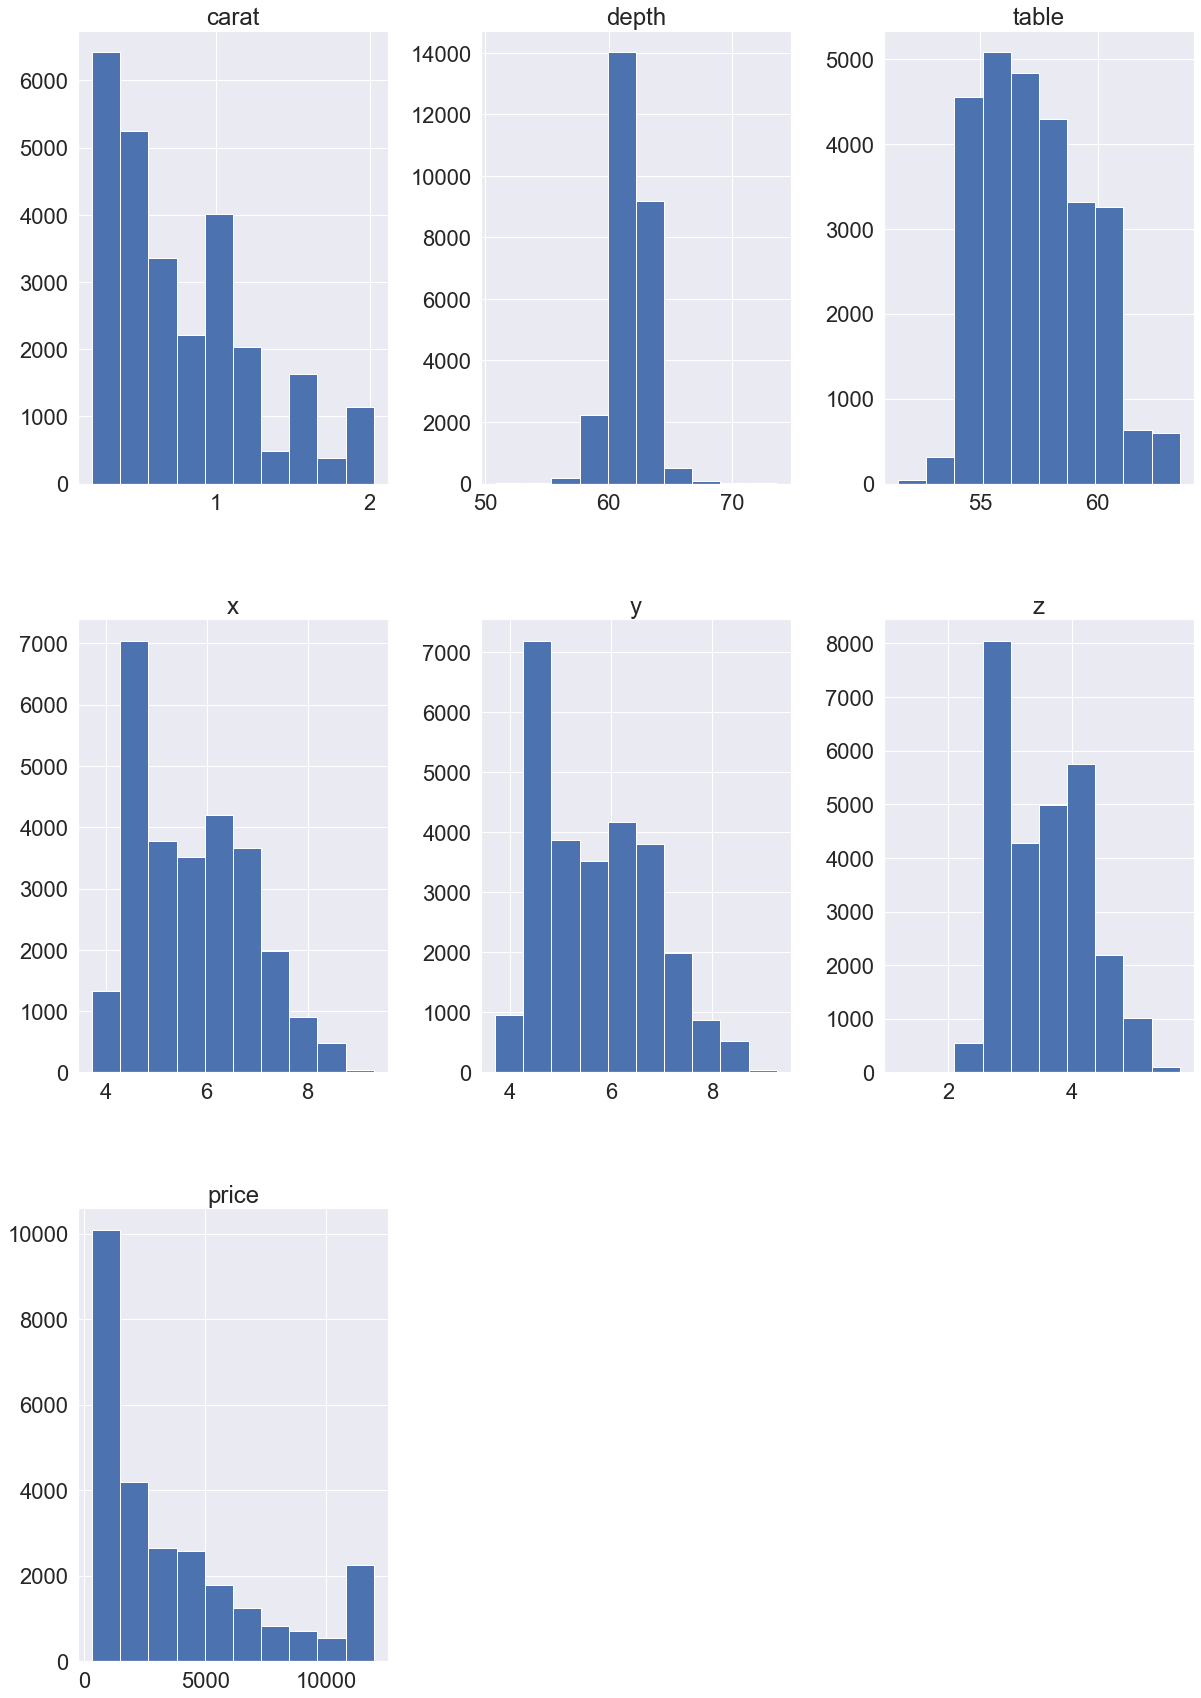

In [456]:
lr_df.hist(figsize=(20,30));

In [457]:
lr_df.skew()   # to measure the skeweness of every attribute.

/var/folders/0f/l_gpn8zs23g2ks0py8f54x9c0000gn/T/ipykernel_2435/3590797549.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  lr_df.skew()   # to measure the skeweness of every attribute.


carat    0.917214
depth   -0.025042
table    0.480476
x        0.397696
y        0.394060
z        0.394819
price    1.157121
dtype: float64

__Inference from the Oberservation-4__
- There is significant amount of outlier present in some variable.
- We can see that the distribution of some quantitative features like "carat" and the target feature "price" are heavily "right-skewed".

__EDA-Step 5 : Bivariate Analysis.__

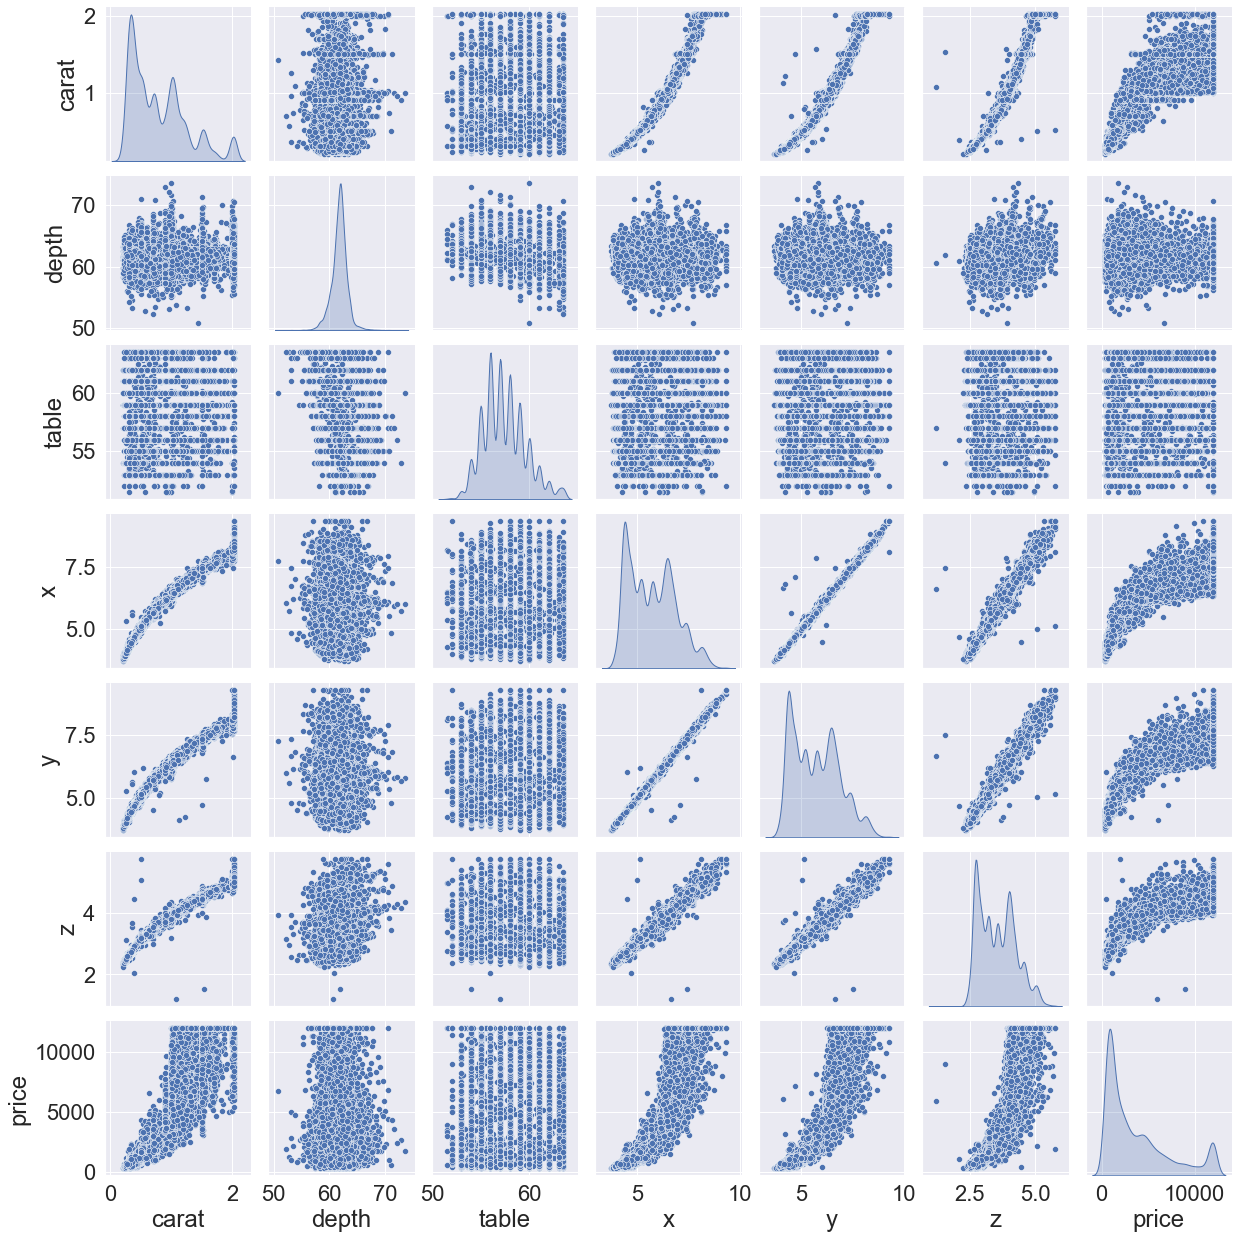

In [458]:
import seaborn as sns

df_attr = ( lr_df[cols])
sns.pairplot(df_attr, diag_kind='kde')  
plt.show()

__Get the Correlation Heatmap__

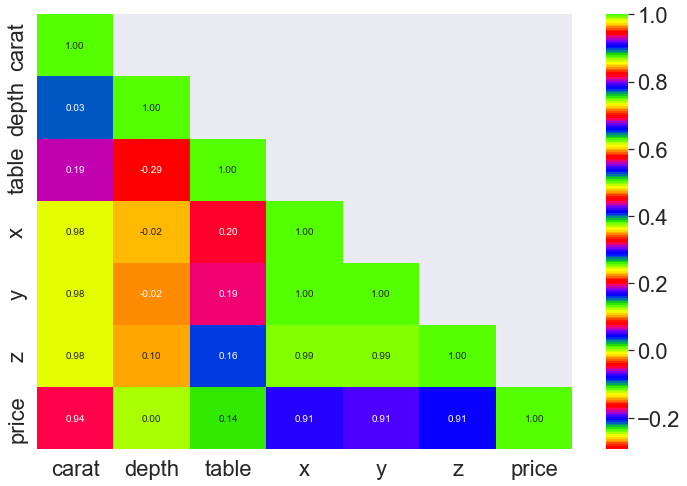

In [459]:
plt.figure(figsize=(12,8))
sns.heatmap(lr_df.corr(),annot=True,fmt='.2f',cmap='prism',mask=np.triu(lr_df.corr(),+1))
plt.show()

__How each feature affects the price of diamonds__

In [460]:
correlations = lr_df.corr()
correlations["price"].sort_values(ascending=False)

price    1.000000
carat    0.936765
y        0.914838
x        0.913409
z        0.908599
table    0.137915
depth    0.000313
Name: price, dtype: float64

__Inference from the Oberservation-5__
- It can be inferred that most features correlate with the price of Diamond. 
- The notable exception is "depth" which has a negligible correlation (<1%).

__EDA for Categorical variable.__

/Users/balask/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


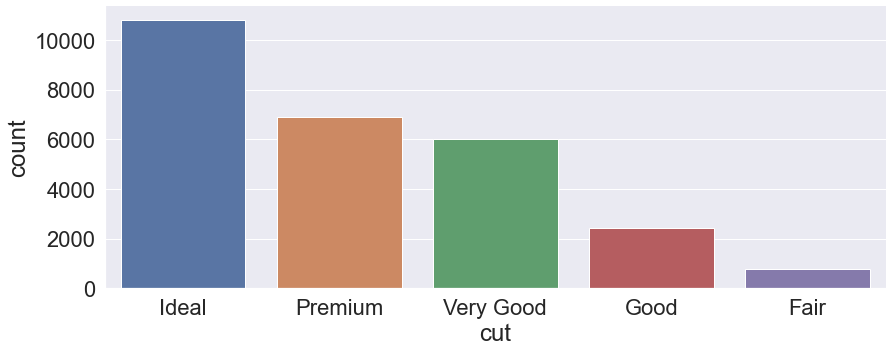

In [461]:
# EDA for categorical columns 'CUT'.
sns.catplot('cut', data=lr_df, kind='count',aspect=2.5)

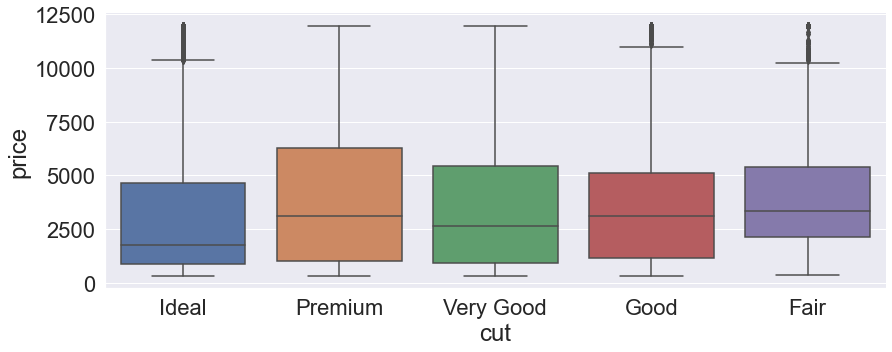

In [462]:
sns.catplot(x='cut', y='price', kind='box', data=lr_df, aspect=2.5)

- bservation on 'CUT': The Premium Cut on Diamonds are the most Expensive, followed by Very Good Cut.

/Users/balask/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


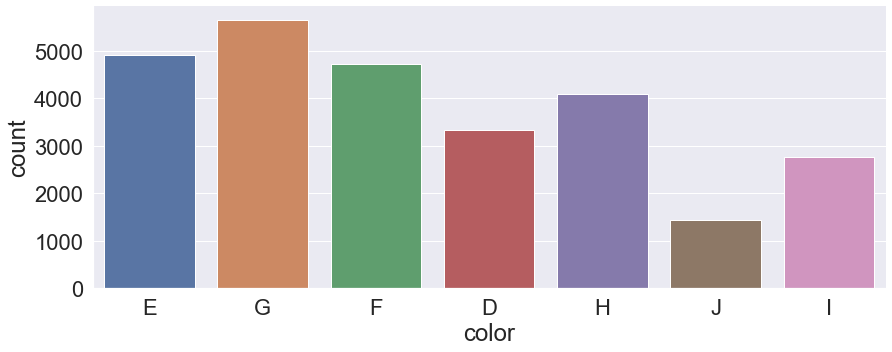

In [463]:
# EDA for categorical columns 'Color'.
sns.catplot('color', kind='count', data=lr_df, aspect=2.5)

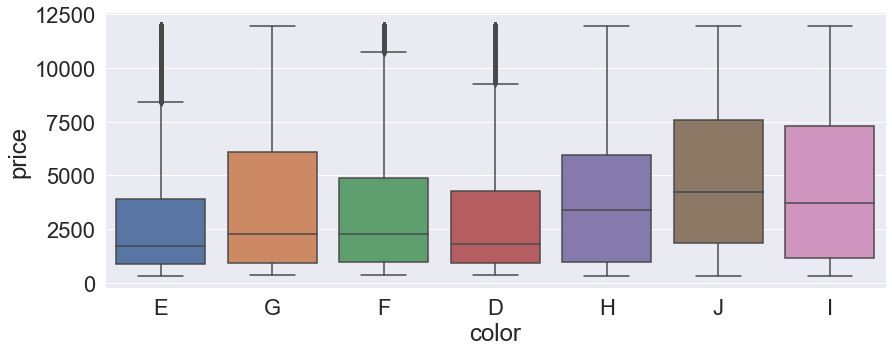

In [464]:
sns.catplot(x='color', y='price', data=lr_df, aspect =2.5, kind='box')

/Users/balask/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


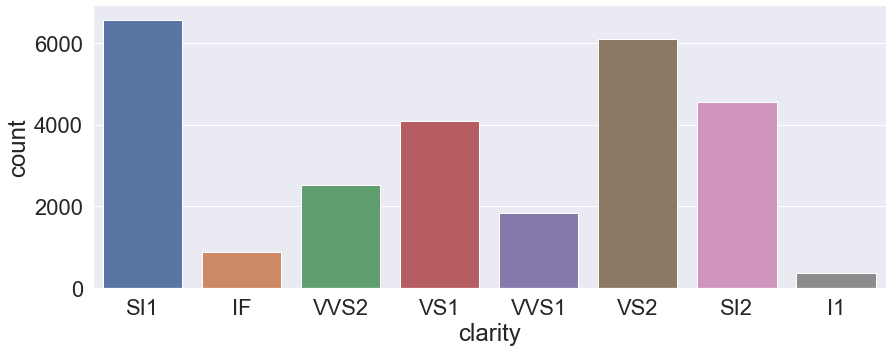

In [465]:
# EDA for categorical columns 'Clarity'.
sns.catplot('clarity', data=lr_df, kind='count',aspect=2.5)

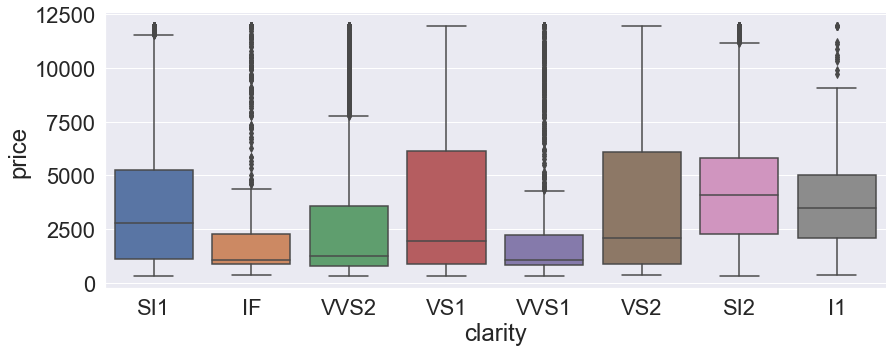

In [466]:
sns.catplot(x='clarity', y='price', data=lr_df, aspect =2.5, kind='box')

## Observation on 'clarity': The Diamonds clarity with VS1 & VS2 are the most Expensive.

__The inferences drawn from the above Exploratory Data analysis:__

__Observation-1:__
- 'Price' is the target variable while all others are the predictors.
- The data set contains 26967 row, 11 column. 
- In the given data set there are 2 Integer type features,6 Float type features. 3 Object type features. Where 'price' is the target variable and all other are predector variable. 
- The first column is an index ("Unnamed: 0")as this only serial no, we can remove it.

__Observation-2:__ (
- On the given data set the the mean and median values does not have much differenc. 
- We can observe Min value of "x", "y", "z" are zero this indicates that they are faulty values. As we know dimensionless or 2-dimensional diamonds are not possible. So we have filter out those as it clearly faulty data entries.
- There are three object data type 'cut', 'color' and 'clarity'.

__Observation-3:__
- we can observe there are 697 missing value in the depth column. 
- There are some duplicate row present. (33 duplicate rows out of 26958). which is nearly 0.12 % of the total data. 
- So on this case we have dropped the duplicated row.

__Observation-4: :__
- There are significant amount of outlier present in some variable,the features with datapoint that are far from the rest of dataset which will affect the outcome of our regression model. 
- So we have treat the outliar. We can see that the distribution of some quantitative features like "carat" and the target feature "price" are heavily "right-skewed".

__Observation-5:__
- It looks like most features do correlate with the price of Diamond. 
- The notable exception is "depth" which has a negligble correlation (~1%). 
- Observation on 'CUT': The Premium Cut on Diamonds are the most Expensive, followed by Very Good Cut.

## 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Check for the possibility of combining the sub levels of a ordinal variables and take actions accordingly. Explain why you are combining these sub levels with appropriate reasoning.

In [467]:
# As we have checked there Are some missing values.
lr_df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [468]:
lr_df.median()

/var/folders/0f/l_gpn8zs23g2ks0py8f54x9c0000gn/T/ipykernel_2435/1605574760.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  lr_df.median()


carat       0.70
depth      61.80
table      57.00
x           5.69
y           5.70
z           3.52
price    2373.00
dtype: float64

__Imputing missing values__

In [469]:
#lets replace the missing values with median value. 
lr_df = lr_df.fillna(lr_df.median())

/var/folders/0f/l_gpn8zs23g2ks0py8f54x9c0000gn/T/ipykernel_2435/2516698964.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  lr_df = lr_df.fillna(lr_df.median())


In [470]:
lr_df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

- Checking for the values which are equal to zero.
- In Qs.1.1 we have alrady check for 'Zero' value. and we can observe there are some amount of 'Zero' value present on the data set on variable 'x', 'y','z'.
- This indicates that they are faulty values.
- As we know dimensionless or 2-dimensional diamonds are not possible. So we have filter out those as it clearly faulty data entries.

In [471]:
lr_df.shape # after removing 'zero value' from data set the data shape became as follows.

(26925, 10)

__Do you think scaling is necessary in this case?__

- Scaling or Standardizing the features around the centre and 0 with a standard deviation of 1 is important when we compare measurements that have different units. Variables that are measured at different scales do not contribute equally to the analysis and might end up creating a bias.

- For example, A variable that ranges between 0 and 1000 will outweigh a variable that ranges between 0 and 1. Using these variables without standardization will give the variable with the larger range weight of 1000 in the analysis. Transforming the data to comparable scales can prevent this problem.

- In this data set we can see the all the variable are in different scale i.e price are in 1000s unit and depth and table are in 100s unit, and carat is in 10s. So its necessary to scale or standardise the data to allow each variable to be compared on a common scale. With data measured in different "units" or on different scales (as here with different means and variances) this is an important data processing step if the results are to be meaningful or not dominated by the variables that have large variances.


__But is scaling necessary in this case?__
- No, it is not necessary, we'll get an equivalent solution whether we apply some kind of linear scaling or not. But recommended for regression techniques as well because it would help gradient descent to converge fast and reach the global minima. When number of features becomes large, it helps is running model quickly else the starting point would be very far from minima, if the scaling is not done in preprocessing.

- For now we will process the model without scaling and later we will check the output with scaled data of regression model output.

## 1.3 Encode the data (having string values) for Modelling. Split the data into train and test (70:30). Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning.

Encode the data (having string values)

__Geting unique counts of all Objects.__

In [472]:
print('cut\n',lr_df.cut.value_counts())
print('\n')
print('color\n',lr_df.color.value_counts())
print('\n')
print('clarity\n',lr_df.clarity.value_counts())
print('\n')

cut
 Ideal        10805
Premium       6880
Very Good     6027
Good          2434
Fair           779
Name: cut, dtype: int64


color
 G    5650
E    4916
F    4722
H    4091
D    3341
I    2765
J    1440
Name: color, dtype: int64


clarity
 SI1     6564
VS2     6092
SI2     4561
VS1     4086
VVS2    2530
VVS1    1839
IF       891
I1       362
Name: clarity, dtype: int64




__Converting objects to categorical codes.__

In [473]:
lr_df['cut']=np.where(lr_df['cut'] =='Ideal', '4', lr_df['cut'])
lr_df['cut']=np.where(lr_df['cut'] =='Premium', '3', lr_df['cut'])
lr_df['cut']=np.where(lr_df['cut'] =='Very Good', '2', lr_df['cut'])
lr_df['cut']=np.where(lr_df['cut'] =='Good', '1', lr_df['cut'])
lr_df['cut']=np.where(lr_df['cut'] =='Fair', '0', lr_df['cut'])

In [474]:
lr_df['color']=np.where(lr_df['color'] =='D', '6', lr_df['color'])
lr_df['color']=np.where(lr_df['color'] =='E', '5', lr_df['color'])
lr_df['color']=np.where(lr_df['color'] =='F', '4', lr_df['color'])
lr_df['color']=np.where(lr_df['color'] =='G', '3', lr_df['color'])
lr_df['color']=np.where(lr_df['color'] =='H', '2', lr_df['color'])
lr_df['color']=np.where(lr_df['color'] =='I', '1', lr_df['color'])
lr_df['color']=np.where(lr_df['color'] =='J', '0', lr_df['color'])

In [475]:
lr_df['clarity']=np.where(lr_df['clarity'] =='IF', '7', lr_df['clarity'])
lr_df['clarity']=np.where(lr_df['clarity'] =='VVS1', '6', lr_df['clarity'])
lr_df['clarity']=np.where(lr_df['clarity'] =='VVS2', '5', lr_df['clarity'])
lr_df['clarity']=np.where(lr_df['clarity'] =='VS1', '4', lr_df['clarity'])
lr_df['clarity']=np.where(lr_df['clarity'] =='VS2', '3', lr_df['clarity'])
lr_df['clarity']=np.where(lr_df['clarity'] =='SI1', '2', lr_df['clarity'])
lr_df['clarity']=np.where(lr_df['clarity'] =='SI2', '1', lr_df['clarity'])
lr_df['clarity']=np.where(lr_df['clarity'] =='I1', '0', lr_df['clarity'])

In [476]:
lr_df.dtypes # The'cut','color','clarity' column still showing as 'Object'.

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price      float64
dtype: object

In [477]:
# converting the'cut','color','clarity' column from object / string type to float.

lr_df['cut'] = lr_df['cut'].astype('float64')
lr_df['color'] = lr_df['color'].astype('float64')
lr_df['clarity'] = lr_df['clarity'].astype('float64')

In [478]:
lr_df.dtypes

carat      float64
cut        float64
color      float64
clarity    float64
depth      float64
table      float64
x          float64
y          float64
z          float64
price      float64
dtype: object

In [479]:
lr_df.head(10)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,4.0,5.0,2.0,62.1,58.0,4.27,4.29,2.66,499.0
1,0.33,3.0,3.0,7.0,60.8,58.0,4.42,4.46,2.70,984.0
2,0.90,2.0,5.0,5.0,62.2,60.0,6.04,6.12,3.78,6289.0
3,0.42,4.0,4.0,4.0,61.6,56.0,4.82,4.80,2.96,1082.0
4,0.31,4.0,4.0,6.0,60.4,59.0,4.35,4.43,2.65,779.0
5,1.02,4.0,6.0,3.0,61.5,56.0,6.46,6.49,3.99,9502.0
6,1.01,1.0,2.0,2.0,63.7,60.0,6.35,6.30,4.03,4836.0
7,0.50,3.0,5.0,2.0,61.5,62.0,5.09,5.06,3.12,1415.0
8,1.21,1.0,2.0,2.0,63.8,63.5,6.72,6.63,4.26,5407.0
9,0.35,4.0,4.0,3.0,60.5,57.0,4.52,4.60,2.76,706.0


__Train-Test Split:__

In [480]:
# Copy all the predictor variables into X dataframe
X = lr_df.drop('price', axis=1)

# Copy target into the y dataframe.This is the dependent variable
y = lr_df[['price']]
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.30,4.0,5.0,2.0,62.1,58.0,4.27,4.29,2.66
1,0.33,3.0,3.0,7.0,60.8,58.0,4.42,4.46,2.70
2,0.90,2.0,5.0,5.0,62.2,60.0,6.04,6.12,3.78
3,0.42,4.0,4.0,4.0,61.6,56.0,4.82,4.80,2.96
4,0.31,4.0,4.0,6.0,60.4,59.0,4.35,4.43,2.65


In [481]:
#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

In [482]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [483]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [484]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 8901.941225070897
The coefficient for cut is 109.18812485149334
The coefficient for color is 272.9213296449051
The coefficient for clarity is 436.441104215492
The coefficient for depth is 8.236971791614971
The coefficient for table is -17.345170384368984
The coefficient for x is -1417.9089304449567
The coefficient for y is 1464.8272701468131
The coefficient for z is -711.2250326814069


## Execution using papermill encountered an exception here and stopped:

__Observation-1:__
- Y=mx +c (m= m1,m2,m3,m4,m5,m6,m7,m8,m9) here 9 diferent co-efficients will learn aling with the intercept which is "c" from the model.
- From the above coefficients for each of the independent attributes we can conclude
- The one unit increase in carat increases price by 8901.941.
- The one unit increase in cut increases price by 109.188. 
- The one unit increase in color increases price by 272.921.
- The one unit increase in clarity increases price by 436.441.
- The one unit increase in y increases price by 1464.827.
- The one unit increase in depth increases price by 8.236,
- But The one unit increase in table decreases price by -17.345,
- The one unit increase in x decreases price by -1417.908,
- The one unit increase in z decreases price by -711.225.

In [485]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -3171.950447307687


__Observation-2:__
- The intercept (often labelled the constant) is the expected mean value of Y when all X=0. If X never equals 0, then the intercept has no intrinsic meaning.

- The intercept for our model is -3171.950447307667. In preset case when the other predictor variable are zero i.e like carat,cut, color, clarity all are zero then the C=-3172. ( Y = m1X1 + m2X2+ ….. + mnXn + C + e) that means price is -3172. which is meaningless. We can do Z score or scaling the data and make it nearly zero.

In [486]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS =  RegErr / TSS

# R square on testing data
regression_model.score(X_test, y_test)

0.931543712584074

__Observation-3:__
- R-square is the percentage of the response variable variation that is explained by a linear model. Or:

- R-square = Explained variation / Total variation

- R-squared is always between 0 and 100%: 0% indicates that the model explains none of the variability of the response data around its mean.100% indicates that the model explains all the variability of the response data around its mean. In this regression model we can see the R-square value on Training and Test data respectively 0.9311935886926559 and 0.931543712584074.

In [487]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

907.1312415459143

In [488]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

911.8447345328436

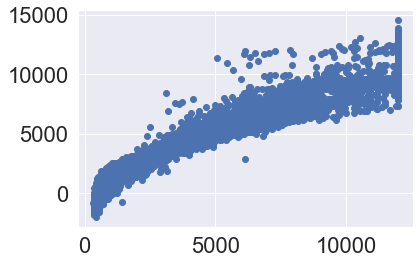

In [489]:
# Since this is regression, plot the predicted y value vs actual y values for the test data
# A good model's prediction will be close to actual leading to high R and R2 values
y_pred = regression_model.predict(X_test)
plt.scatter(y_test['price'], y_pred)

__Observation-4:__
- we can see that the is a linear plot, very strong corelation between the predicted y and actual y. But there are lots of spread. That indicated some kind noise present on the data set i.e Unexplained variances on the output.

__Linear regression Performance Metrics:__

- intercept for the model: -3171.950447307667
- R square on training data: 0.9311935886926559
- R square on testing data: 0.931543712584074
- RMSE on Training data: 907.1312415459143
- RMSE on Testing data: 911.8447345328436
- As the training data & testing data score are almost inline, we can conclude this model is a Right-Fit Model.

__Applying zscore statsmodels__

In [490]:
from scipy.stats import zscore

X_train_scaled  = X_train.apply(zscore)
X_test_scaled = X_test.apply(zscore)
y_train_scaled = y_train.apply(zscore)
y_test_scaled = y_test.apply(zscore)

In [491]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [492]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 1.18377370617794
The coefficient for cut is 0.03512500065529717
The coefficient for color is 0.13449269287641522
The coefficient for clarity is 0.2080977932562188
The coefficient for depth is 0.0033262937188391355
The coefficient for table is -0.010815851633643132
The coefficient for x is -0.45968984241252736
The coefficient for y is 0.47166270917924324
The coefficient for z is -0.14249737973827103


In [493]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -5.879615251304727e-16


In [494]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS

regression_model.score(X_test_scaled, y_test_scaled)

0.9315051288558229

__Observation-5:__
- Now we can observe by applying z score the intercept became -5.87961525130473e-16. 
- Earlier it was -3171.950447307667. the co-efficient has changed, the bias became nearly zero but the overall accuracy still same.

__Check Multi-collinearity using VIF__

In [495]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

In [496]:
i=0
for column in X.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 121.96543302739589
cut ---> 10.388738909800333
color ---> 5.546407587131623
clarity ---> 5.455999699082339
depth ---> 1218.3824913329145
table ---> 878.3985698779234
x ---> 10744.05623520385
y ---> 9482.053091580401
z ---> 3697.5688286012546


- We can observe there are very strong multi collinearity present in the data set. Ideally it should be within 1 to 5.

- We are exploring the Linear Regression using statsmodels as we are interested in some more statistical metrics of the model.


## Linear Regression using statsmodels.

__concatenate X and y into a single dataframe__

In [497]:
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
5030,1.10,1.0,5.0,1.0,63.3,56.0,6.53,6.58,4.15,4065.0
12108,1.01,2.0,6.0,1.0,64.0,56.0,6.30,6.38,4.06,5166.0
20181,0.67,1.0,1.0,3.0,60.7,61.4,5.60,5.64,3.41,1708.0
4712,0.76,1.0,3.0,2.0,57.7,63.0,6.05,5.97,3.47,2447.0
2548,1.01,3.0,3.0,4.0,62.8,59.0,6.37,6.34,3.99,6618.0


In [498]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'price ~ carat+cut+color+clarity+depth+table+x+y+z', data = data_train).fit()
lm1.params

Intercept   -3171.950447
carat        8901.941225
cut           109.188125
color         272.921330
clarity       436.441104
depth           8.236972
table         -17.345170
x           -1417.908930
y            1464.827270
z            -711.225033
dtype: float64

In [499]:
print(lm1.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                 2.833e+04
Date:                Sun, 03 Jul 2022   Prob (F-statistic):               0.00
Time:                        12:43:28   Log-Likelihood:            -1.5510e+05
No. Observations:               18847   AIC:                         3.102e+05
Df Residuals:                   18837   BIC:                         3.103e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3171.9504    787.532     -4.028      0.0

__Observation-6:__
- Assuming null hypothesis is true, i.e there is no relationship between this variable with price. from that universe we have drawn the sample and on this sample we have found this co-efficient for the variable shown above.

- Now we can ask what is the probability of finding this co-efficient in this drawn sample if in the real world the co-efficient is zero. As we see here the overall P value is less than alpha, so rejecting H0 and accepting Ha that atleast 1 regression co-efficient is not '0'. Here all regression co-efficients are not '0'.

- For an example: we can see the p value is showing 0.449 for 'depth' variable, which is much higher than 0.05. That means this dimension is useless. So we can say that the attribute which are having p value greater than 0.05 are poor predictor for price.

In [500]:
# Calculate MSE
mse = np.mean((lm1.predict(data_train.drop('price',axis=1))-data_train['price'])**2)

In [501]:
# Calculate MSE
mse1 = np.mean((lm1.predict(data_test.drop('price',axis=1))-data_test['price'])**2)

In [502]:
#Root Mean Squared Error - RMSE
np.sqrt(mse)

907.1312415459126

In [503]:
#Root Mean Squared Error - RMSE
np.sqrt(mse1)

911.844734532844

In [504]:
# Prediction on Test data
y_pred = lm1.predict(data_test)

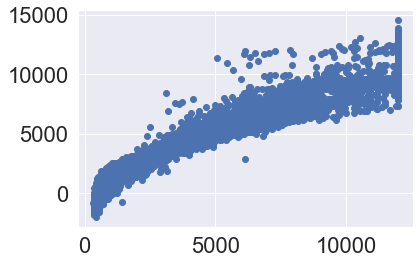

In [505]:
plt.scatter(y_test['price'], y_pred)
plt.show()

In [506]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(-3171.95) * Intercept + (8901.94) * carat + (109.19) * cut + (272.92) * color + (436.44) * clarity + (8.24) * depth + (-17.35) * table + (-1417.91) * x + (1464.83) * y + (-711.23) * z + 

__The final Linear Regression equation is following__

price = b0 + b1 *carat[T.True] + b2 * cut + b3 * color + b4 * clarity+ b5 * depth + b6 * table + b7 * x + b8 * y + b9 *z True

price = (-3171.95) * Intercept + (8901.94) * carat + (109.19) * cut + (272.92) * color + (436.44) * clarity + (8.24) * depth + (-17.35) * table + (-1417.91)) * x + (1464.83) * y + (-711.23) * z _True

- When carat increases by 1 unit, diamond price increases by 8901.94 units, keeping all other predictors constant.
- When cut increases by 1 unit, diamond price increases by 109.19 units, keeping all other predictors constant.
- When color increases by 1 unit, diamond price increases by 272.92 units, keeping all other predictors constant.
- When clarity increases by 1 unit, diamond price increases by 436.44 units, keeping all other predictors constant.
- When y increases by 1 unit, diamond price increases by 1464.83 units, keeping all other predictors constant.
- As per model these five attributes that are most important attributes 'Carat', 'Cut', 'color','clarity' and width i.e 'y' for predicting the price.

- There are also some negative co-efficient values, for instance, corresponding co-efficient (-1417.91) for 'x',(-711.23) for z and (-17.35) for table This implies, these are inversely proportional with diamond price.

__Observation-7:__

- On the given data set we can see the 'X' i.e Length of the cubic zirconia in mm. having negative co-efficient. And the p value is less than 0.05, so can conclude that as higher the length of the stone is a lower profitable stones.

- Similarly for the 'z' variable having negative co-efficient i.e -711.23. And the p value is less than 0.05, so we can conclude that as higher the 'z' of the stone is a lower profitable stones.

- Also we can see the 'y' width in mm having positive co-efficient. And the p value is less than 0.05, so we can conclude that higher the width of the stone is a higher profitable stones.

- Finally we can conclude that best 5 attributes that are most important are 'Carat', 'Cut', 'color','clarity' and width i.e 'y' for predicting the price.

## 1.4 Inference: Basis on these predictions, what are the business insights and recommendations.

__Inference:__

- we can see that the from the linear plot, very strong corelation between the predicted y and actual y. But there are lots of spread. That indicates some kind noise present on the data set i.e Unexplained variances on the output.

__Linear regression Performance Metrics:__

- intercept for the model: -3171.950447307667
- R square on training data: 0.9311935886926559
- R square on testing data: 0.931543712584074
- RMSE on Training data: 907.1312415459143
- RMSE on Testing data: 911.8447345328436
- As the training data & testing data score are almost inline, we can conclude this model is a Right-Fit Model.

__Impact of scaling:__
- Now we can observe by applying z score the intercept became -5.87961525130473e-16. Earlier it was -3171.950447307667. the co-efficient has changed, the bias became nearly zero but the overall accuracy still same.

__Multi collinearity:__
- We can observe there are very strong multi collinearity present in the data set.

__From statsmodels:__
- we can see R-squared:0.931 and Adj. R-squared: 0.931 are same. The overall P value is less than alpha.

- Finally we can conclude that Best 5 attributes that are most important are 'Carat', 'Cut', 'color','clarity' and width i.e 'y' for predicting the price.

- When 'carat' increases by 1 unit, diamond price increases by 8901.94 units, keeping all other predictors constant.
- When 'cut' increases by 1 unit, diamond price increases by 109.19 units, keeping all other predictors constant.
- When 'color' increases by 1 unit, diamond price increases by 272.92 units, keeping all other predictors constant.
- When 'clarity' increases by 1 unit, diamond price increases by 436.44 units, keeping all other predictors constant.
- When 'y' increases by 1 unit, diamond price increases by 1464.83 units, keeping all other predictors constant.

- we can see the p value is showing 0.449 for depth variable, which is much greater than 0.05. That means this attribute is useless.

- There are also some negative co-efficient values, we can see the 'X' i.e Length of the cubic zirconia in mm. having negative co-efficient -1417.9089. And the p value is less than 0.05, so can conclude that as higher the length of the stone is a lower profitable stones.

- Similarly for the 'z' variable having negative co-efficient i.e -711.23. And the p value is less than 0.05, so we can conclude that as higher the 'z' of the stone is a lower profitable stones.

__Recommendations:__

- The Gem Stones company should consider the features'Carat', 'Cut', 'color','clarity' and width i.e 'y' as most important for predicting the price.
To distinguish between higher profitable stones and lower profitable stones so as to have better profit share.

- As we can see from the model Higher the width('y') of the stone is higher the price.

- So the stones having higher width('y') should consider in higher profitable stones.

- The 'Premium Cut' on Diamonds are the most Expensive, followed by 'Very Good' Cut, these should consider in higher profitable stones.

- The Diamonds clarity with 'VS1' &'VS2' are the most Expensive.So these two category also consider in higher profitable stones.

- As we see for 'X' i.e Length of the stone, higher the length of the stone is lower the price.

- So higher the Length('x') of the stone are lower is the profitability.

- higher the 'z' i.e Height of the stone is, lower the price.This is because if a Diamond's Height is too large Diamond will become 'Dark' in appearance because it will no longer return an Attractive amount of light. That is why

- Stones with higher 'z' is also are lower in profitability.


##                                               ***End of Problem 1***

# Problem 2: Logistic Regression and LDA


You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

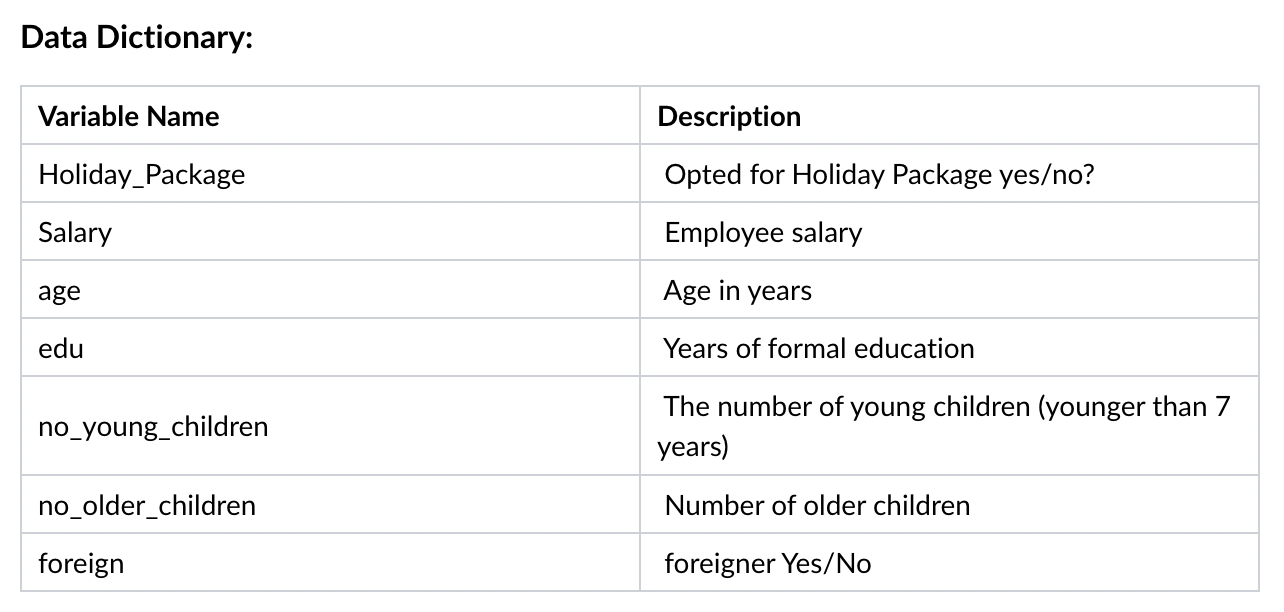

## 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.

__Read the dataset in to the notebook__

In [507]:

df2= pd.read_csv('Holiday_Package.csv',index_col=0)

In [508]:
# taking backup copy
df2_bkp = df2.copy()

In [509]:
df2.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
1,no,48412,30,8,1,1,no
2,yes,37207,45,8,0,1,no
3,no,58022,46,9,0,0,no
4,no,66503,31,11,2,0,no
5,no,66734,44,12,0,2,no


In [510]:
df2.tail()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
868,no,40030,24,4,2,1,yes
869,yes,32137,48,8,0,0,yes
870,no,25178,24,6,2,0,yes
871,yes,55958,41,10,0,1,yes
872,no,74659,51,10,0,0,yes


### __Exploratory Data Analysis__

__Checking the data types /information__

In [511]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 872 entries, 1 to 872
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 54.5+ KB


__Inference from the information of the data:__
- The data set contains 872 observations of data and 7 features. 
- Since non null count is same in every column variable except depth, there appears no null data.

__Checking the shape (Number of rows and columns)__

In [512]:
df2.shape

(872, 7)

__Checking for duplicates__

In [513]:
# Check for duplicate data

dups = df2.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df2[dups]

Number of duplicate rows = 0


,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign


__Inference from the checking the duplicates:__
- No duplicated data is present.

__Univariate Analysis__

In [514]:
# creating a function to return CV, skew, IQR, Upper range, lower range of dataframe
def CV_row(df):   
    i=0;
    CV=[]
    Skew=[]
    IQR=[]
    UR=[]
    LR=[]
    numeric_col_names=df.select_dtypes(exclude='object').columns
    for i in df.columns:
        if (i in numeric_col_names):
            CV.append(round(variation(df[i]),2))
            Skew.append(round(df[i].skew(),2))
            IQR_val, lower_range, upper_range = return_IQR_LR_UR(df[i])
            IQR.append(round(IQR_val,2))
            UR.append(round(upper_range,2))
            LR.append(round(lower_range,2))

    return CV, Skew, IQR,  UR, LR       

In [515]:
def calc_rows(Col_list,no_of_graph_row=4):  
    if (len(Col_list) % no_of_graph_row == 0):
        rows= len(Col_list) / no_of_graph_row
    else:
        rows= len(Col_list) / no_of_graph_row + 1
    return rows

__Checking for summary__

In [516]:
df2_summ.round(4).T

,count,mean,std,min,25%,50%,75%,max
Salary,872.0,47729.1720,23418.6685,1322.0,35324.0,41903.5,53469.5,236961.0
age,872.0,39.9553,10.5517,20.0,32.0,39.0,48.0,62.0
educ,872.0,9.3073,3.0363,1.0,8.0,9.0,12.0,21.0
no_young_children,872.0,0.3119,0.6129,0.0,0.0,0.0,0.0,3.0
no_older_children,872.0,0.9828,1.0868,0.0,0.0,1.0,2.0,6.0


__From summary, we can see that :-__

- max salary(236K) is very high as compared to mean(47K) and median(42K). Hence it contains outlier
- Mean and median of age are approximately similar 39-40. It doesnt contains outlier.
- Education middle 50% of data lies in between 8 to 12 range with few outliers.
- Most employees have no of young children as 0.
- Most of the employees have 1 child who is older than 7 years
- All the columns are positively skewed except education

__Checking for missing values__

In [517]:
# Check for missing value in any colum
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    percent = percent.round(2)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(df2)

,Total,Percent
Holliday_Package,0,0.0
Salary,0,0.0
age,0,0.0
educ,0,0.0
no_young_children,0,0.0
no_older_children,0,0.0
foreign,0,0.0


__Inference from the checking for missing values:__
- We can confirm that there are no NULL values in the data

__Check for Outliers (Which all variables have an outlier__

/var/folders/0f/l_gpn8zs23g2ks0py8f54x9c0000gn/T/ipykernel_2435/1067814055.py:11: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(rows,no_of_graphs_rows,box_plot_no)
/var/folders/0f/l_gpn8zs23g2ks0py8f54x9c0000gn/T/ipykernel_2435/1067814055.py:11: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(rows,no_of_graphs_rows,box_plot_no)
/var/folders/0f/l_gpn8zs23g2ks0py8f54x9c0000gn/T/ipykernel_2435/1067814055.py:11: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(rows,no_of_graphs_rows,box_plot_no)
/var/folders/0f/l_gpn8zs23g2ks0py8f54x9c0000gn/T/ipykernel_2435/1067814055.py:11: MatplotlibDeprecationWarning: Passing n

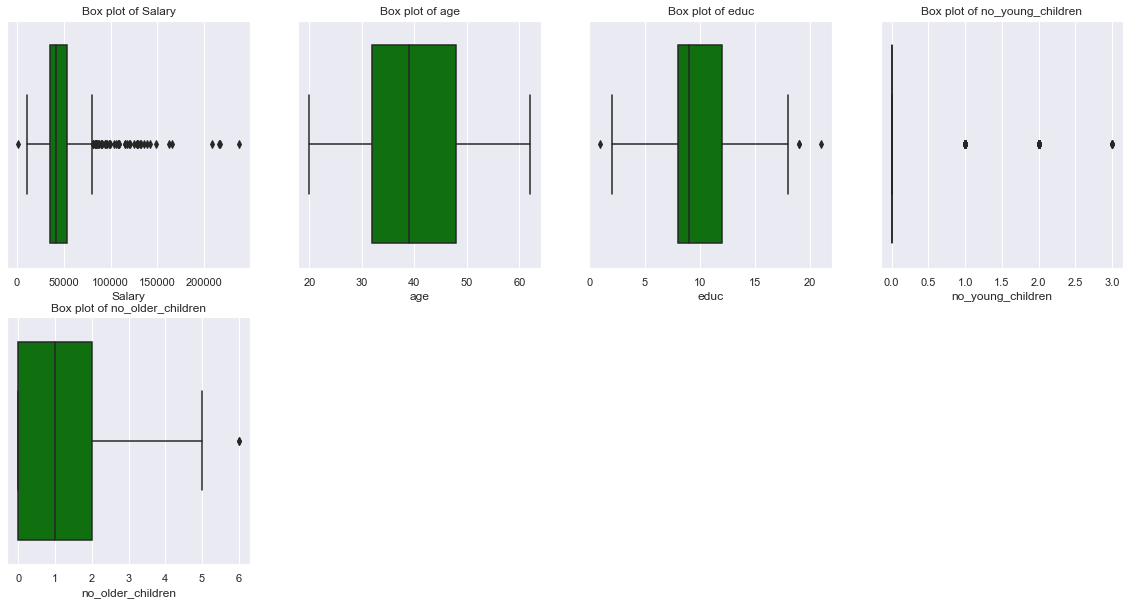

In [518]:
# Checking for Outliers
numeric_col_names=df2.select_dtypes(exclude='object').columns
no_of_graphs_rows=4
rows=calc_rows(numeric_col_names, no_of_graphs_rows)
sns.set(font_scale=1)
plt.figure(figsize= (20,10))
box_plot_no=1
for col in df2.columns :
    if (col in numeric_col_names):
        box_plot_title = "Box plot of " + col
        plt.subplot(rows,no_of_graphs_rows,box_plot_no)
        sns.boxplot(x= col,data =df2 ,color='green').set(title =box_plot_title)
        box_plot_no = box_plot_no + 1 

__Inference from the check for outliers:__
- As evident from above box plot, there are many outliers in salary column.

- Education, no of young childern and old children columns have very few outliers which we can ignore

__Plot the Histograms__

/var/folders/0f/l_gpn8zs23g2ks0py8f54x9c0000gn/T/ipykernel_2435/3522671414.py:11: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(rows,no_of_graphs_rows,distplot_no)
/var/folders/0f/l_gpn8zs23g2ks0py8f54x9c0000gn/T/ipykernel_2435/3522671414.py:11: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(rows,no_of_graphs_rows,distplot_no)
/var/folders/0f/l_gpn8zs23g2ks0py8f54x9c0000gn/T/ipykernel_2435/3522671414.py:11: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(rows,no_of_graphs_rows,distplot_no)
/var/folders/0f/l_gpn8zs23g2ks0py8f54x9c0000gn/T/ipykernel_2435/3522671414.py:11: MatplotlibDeprecationWarning: Passing n

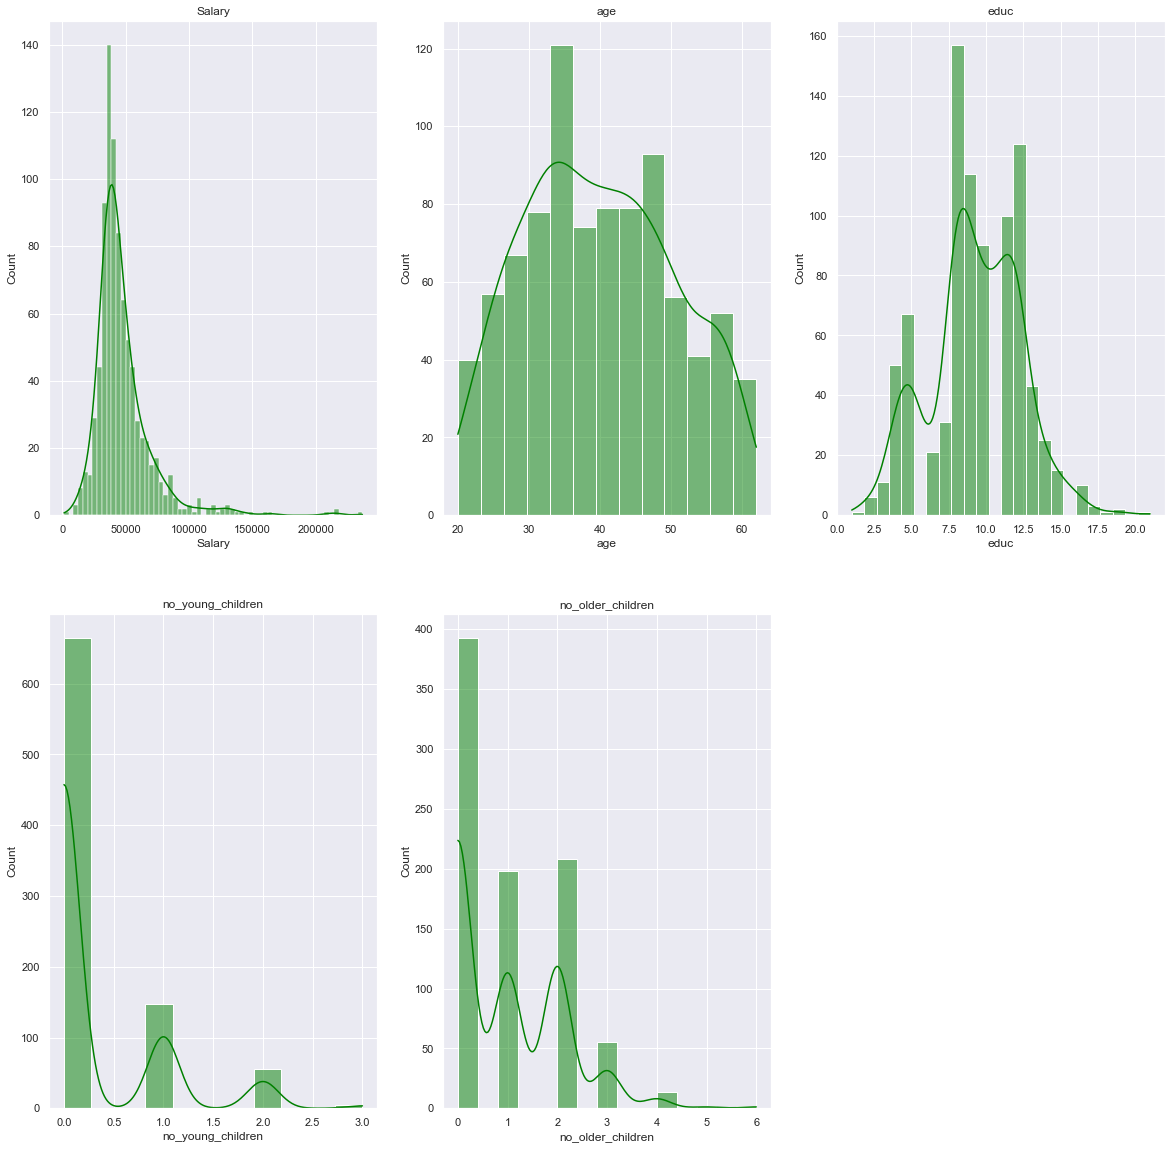

In [519]:
#Plots to see the distribution of the continuous features individually
plt.figure(figsize= (20,20))
distplot_no=1
sns.set(font_scale=1)
no_of_graphs_rows=3
rows=calc_rows(numeric_col_names, no_of_graphs_rows)

for col in df2.columns :
    if (col in numeric_col_names):
        distplot_title = col
        plt.subplot(rows,no_of_graphs_rows,distplot_no)
        sns.histplot(df2[col] ,color='green',kde=True).set(title =distplot_title)
        distplot_no = distplot_no + 1 

__From histograms we can see that__

- Salary range is 0-100000 for most of the employees. However few employees are getting more salary causing skewness
- Age appears to be normally distributed
- Around 650 employees out of 872 have their young children as 0.
- Around 380 out of 872 employees have no of older children as 0
- Education middle 50% of data lies in between 8 to 12 range with few outliers.

__Correcting Spelling error in Column names__

In [520]:
df2.columns

Index(['Holliday_Package', 'Salary', 'age', 'educ', 'no_young_children',
       'no_older_children', 'foreign'],
      dtype='object')

In [521]:
df2.rename(columns={'Holliday_Package':'Holiday_Package'},inplace=True)
df2.rename(columns={'Holiday_Package':'HolidayPackage','age':'Age','educ':'Educ','no_young_children':'No_young_children','no_older_children':'No_older_children','foreign':'Foreign'},inplace=True)

In [522]:
df2.columns

Index(['HolidayPackage', 'Salary', 'Age', 'Educ', 'No_young_children',
       'No_older_children', 'Foreign'],
      dtype='object')

### __Bi-variate, and multivariate analysis__

__Checking the unique values for categorical variables__

In [523]:
for column in df2.columns:
    if df2[column].dtype == 'object':
        print(column,': ',df2[column].nunique())
        print(df2[column].value_counts().sort_values())
        print('\n')

HolidayPackage :  2
yes    401
no     471
Name: HolidayPackage, dtype: int64


Foreign :  2
yes    216
no     656
Name: Foreign, dtype: int64




__Swarm Plots__

<AxesSubplot:xlabel='HolidayPackage', ylabel='Age'>

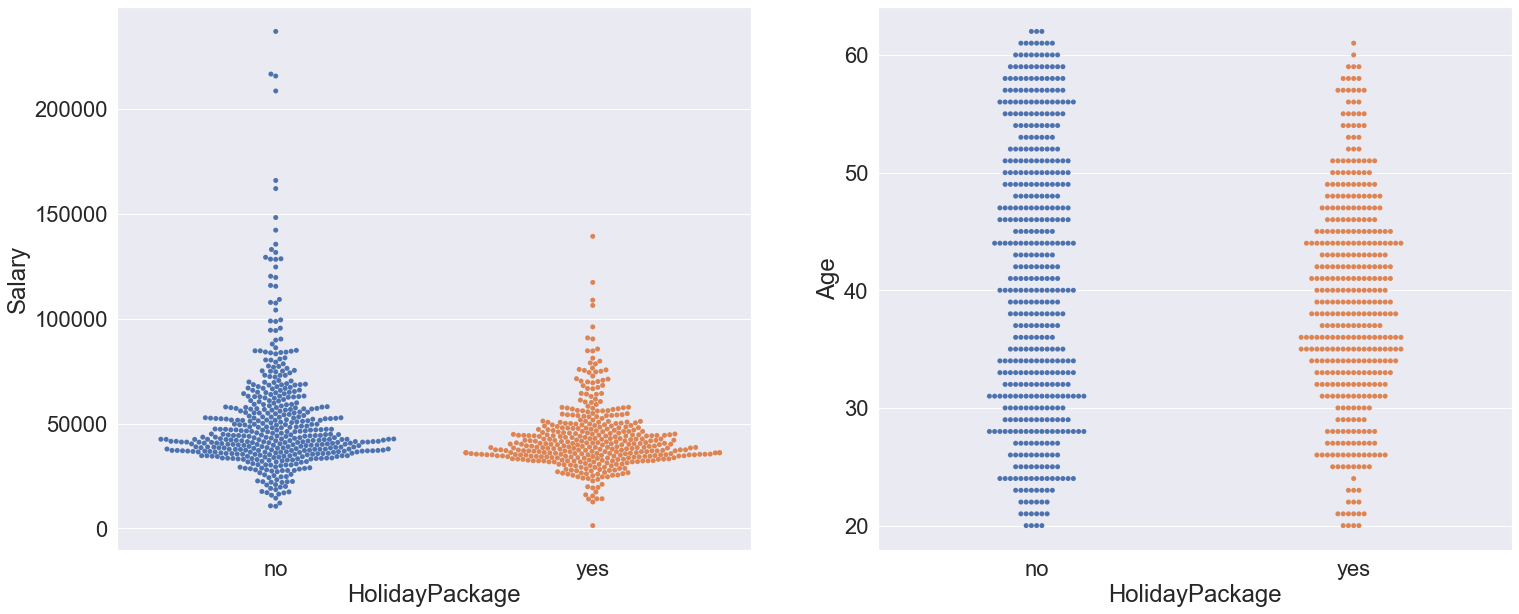

In [524]:
plt.figure(figsize=(25,10))
sns.set(font_scale=2)
plt.subplot(1,2,1)
sns.swarmplot(data=df2,x='HolidayPackage', y='Salary')
plt.subplot(1,2,2)
sns.swarmplot(data=df2,x='HolidayPackage', y='Age')

__Inference from the swarm plot:__
- We can see that as:- As Salary increases to the max value, employees count increases for the not opting for the holiday package. 
- As Age increases beyond 50 level, less emplyees opt for the holiday package

__Count Plot__

<AxesSubplot:xlabel='Foreign', ylabel='count'>

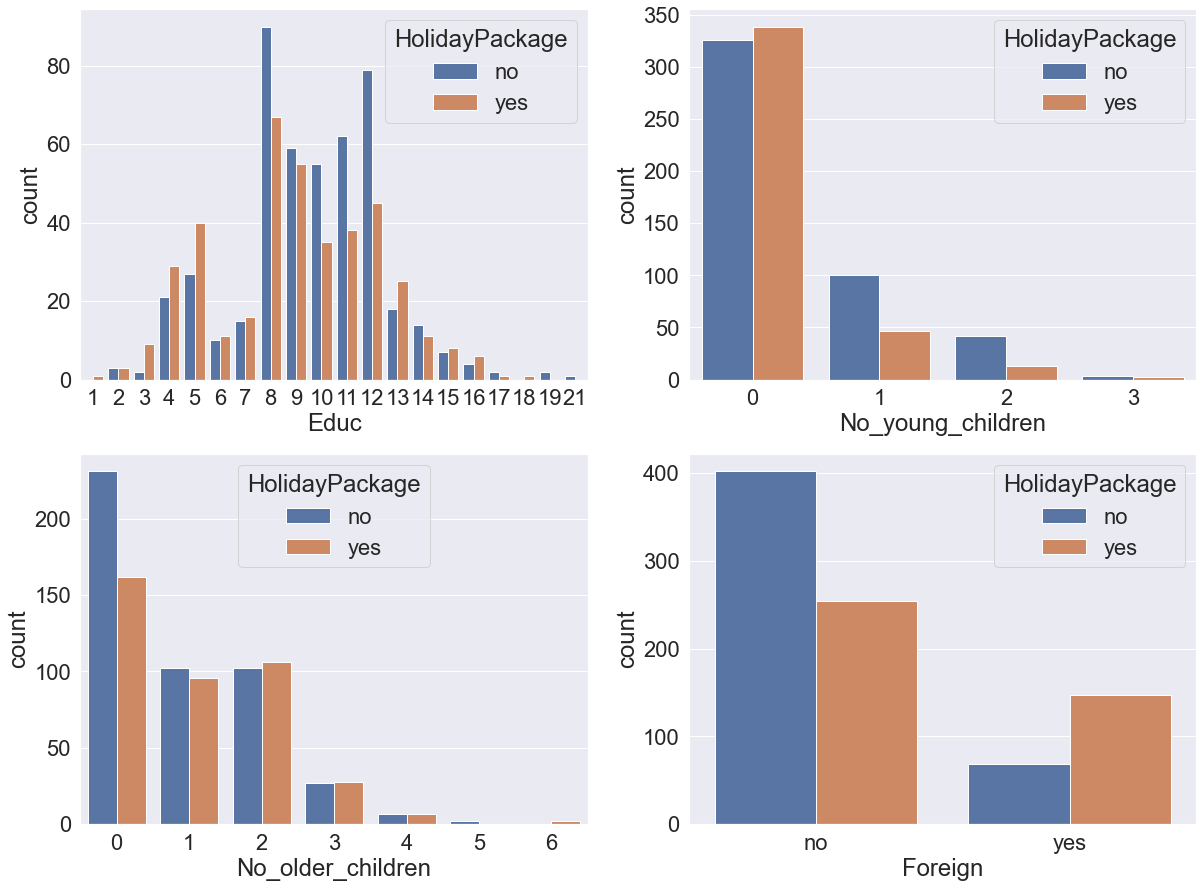

In [525]:
### Count plot
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
sns.countplot(data=df2,hue='HolidayPackage', x='Educ')
plt.subplot(2,2,2)
sns.countplot(data=df2,hue='HolidayPackage', x='No_young_children')
plt.subplot(2,2,3)
sns.countplot(data=df2,hue='HolidayPackage', x='No_older_children')
plt.subplot(2,2,4)
sns.countplot(data=df2,hue='HolidayPackage', x='Foreign')

__Inference from the Count plot:__
- More Employess opt for Tours if their education level is 3,4,5,6,7,13,14,15,16
- Employees dont opt for tours if they have young child
- Older children count doesnt appearst to have much impact on tour opted by employees or not
- Foreigner employees tends to opt more for the tour

In [526]:
pd.crosstab(df2['No_young_children'],df2['HolidayPackage'],margins=True)

HolidayPackage,no,yes,All
No_young_children,,,
0,326,339,665
1,100,47,147
2,42,13,55
3,3,2,5
All,471,401,872


We can see that around 24% of employees have one or more young child. Out of these employees, 70% ((100+42+3)/(147+55+5)) are not opting for tours.

In [527]:
(100+42+3)/(147+55+5)

0.7004830917874396

In [528]:
pd.crosstab(df2['Foreign'],df2['HolidayPackage'],margins=True)

HolidayPackage,no,yes,All
Foreign,,,
no,402,254,656
yes,69,147,216
All,471,401,872


As per the data, we can say that 68% of foreign employees are opting for the tour packages.

__Correlation matrix__

In [529]:
Cor=df2.corr().round(2)
Cor

,Salary,Age,Educ,No_young_children,No_older_children
Salary,1.00,0.07,0.33,-0.03,0.11
Age,0.07,1.00,-0.15,-0.52,-0.12
Educ,0.33,-0.15,1.00,0.10,-0.04
No_young_children,-0.03,-0.52,0.10,1.00,-0.24
No_older_children,0.11,-0.12,-0.04,-0.24,1.00


__Heat Map__

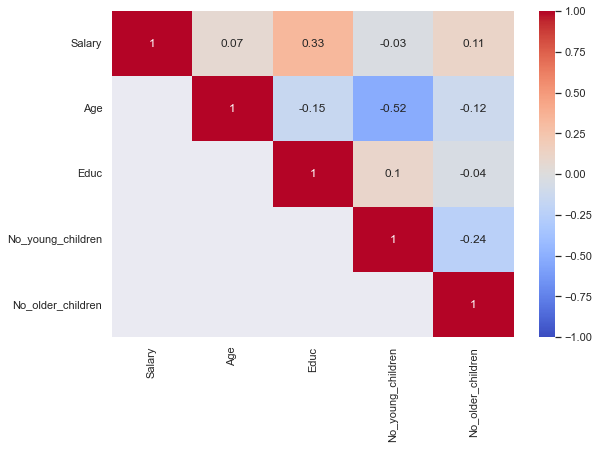

In [530]:

# plot the correlation coefficients as a heatmap
## Correlation Matrix
sns.set(font_scale=1)
plt.figure(figsize=(9 ,6))
mask = np.array(Cor)
mask[np.triu_indices_from(mask)] =False
sns.heatmap(data =Cor, annot =True, mask =mask,vmax =1, vmin=-1, cmap ='coolwarm');

__Inference from the Heat map:__
- We can see in heatmap & correlation matrix that Salary has correlation with educ.
- Age is negatively correlated with No_young_children

__Pairplot__

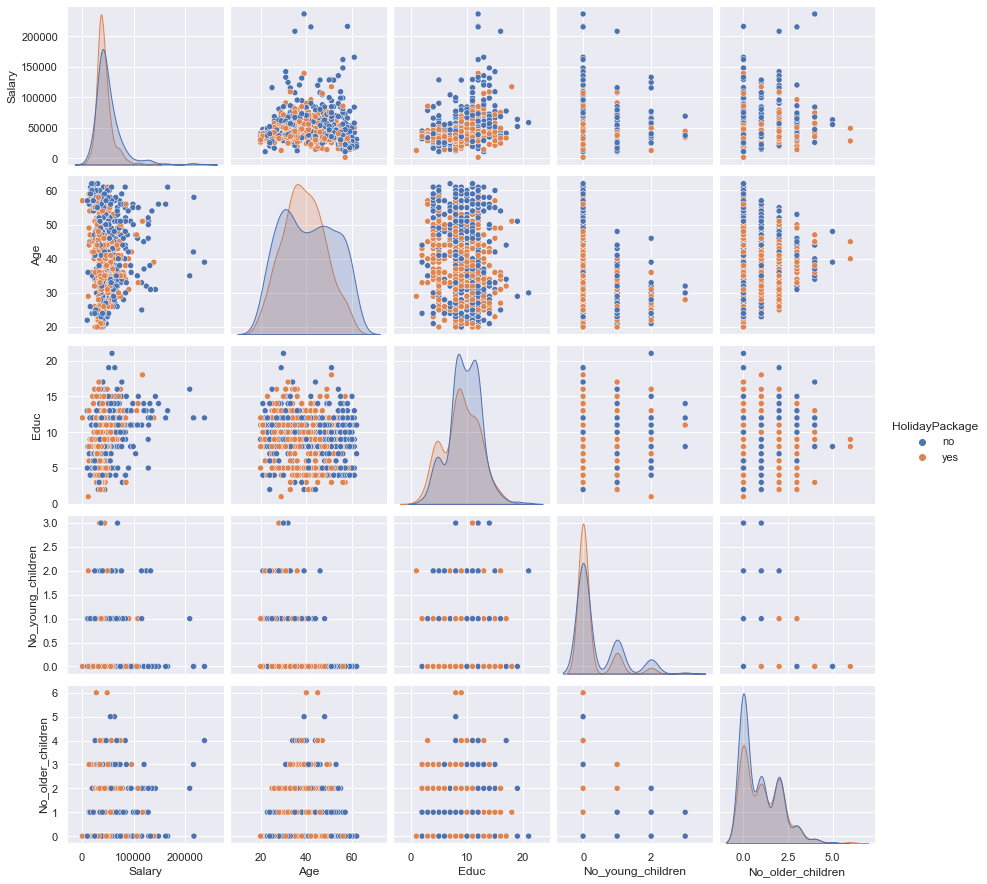

In [531]:
sns.pairplot(df2,hue='HolidayPackage',diag_kind='kde')

__Inference from the Pairplot:__
- As depicted in heat map of correlation matrix, we can see that no of young children negatively correlated with age.

- Salary is slightly correlated with Educ

__VIF Checking for Multicollinearity__

In [532]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [533]:
def checkvif(X):
    vif = pd.DataFrame()
    vif["Variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    print (vif)

In [534]:
df2.columns

Index(['HolidayPackage', 'Salary', 'Age', 'Educ', 'No_young_children',
       'No_older_children', 'Foreign'],
      dtype='object')

In [535]:
X = df2[['Salary','Age','Educ','No_young_children','No_older_children']]
checkvif(X)

           Variables       VIF
0             Salary  6.027872
1                Age  6.832751
2               Educ  8.890845
3  No_young_children  1.403995
4  No_older_children  1.817912


__Inference from the CIF Checking for Multicollinearity:__
- We can see that VIF is greator than 5 for salary, age and education. 
- However its value is less than 10. So dataset has some multicollinearity

__Outlier treatment (flooring and capping)__

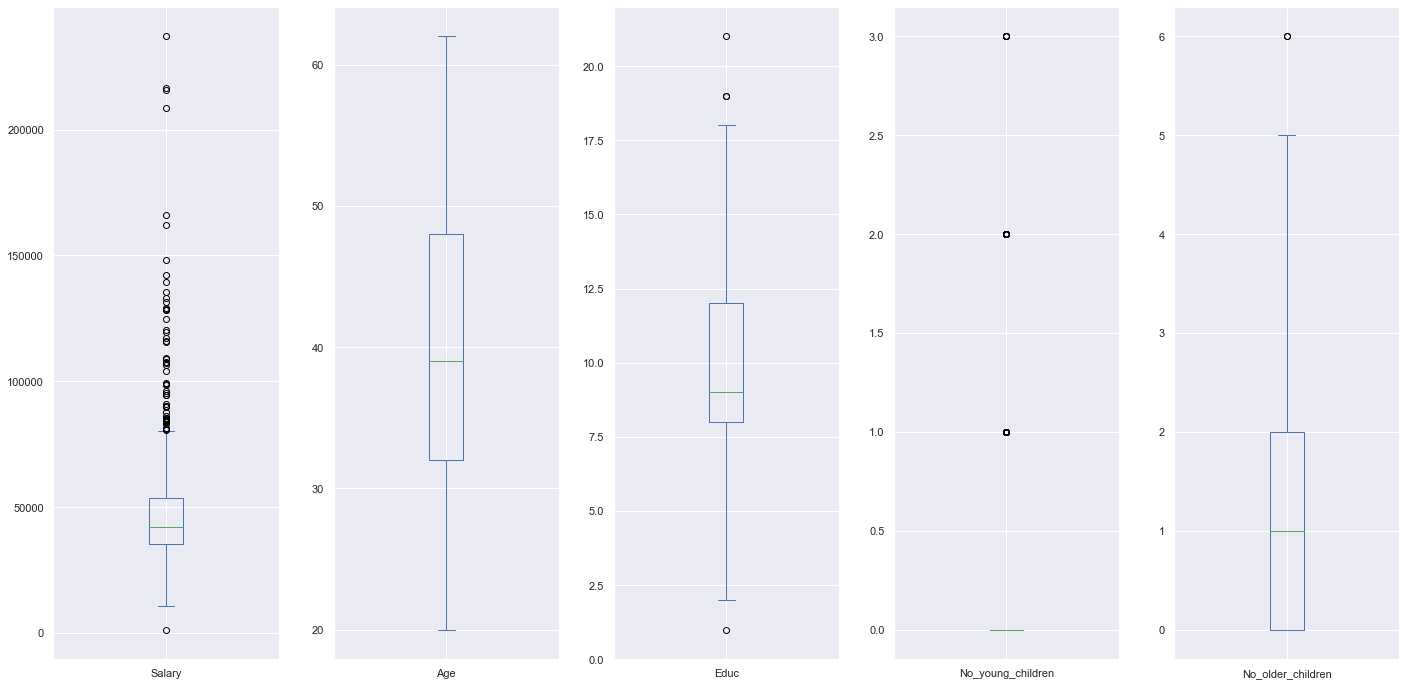

In [536]:
df2.plot(kind='box',subplots=True,figsize=(20,10))
plt.tight_layout(pad=2.0)

In [537]:
numeric_cols = df2.select_dtypes(include=[np.number]).columns

numeric_cols

Index(['Salary', 'Age', 'Educ', 'No_young_children', 'No_older_children'], dtype='object')

In [629]:
from scipy import stats

z=np.abs(stats.zscore(df2['Salary']))

listin= np.where(z>3)

outlier = list((int(j) for i in listin for j in i)) 
print("the number of outliers are ", len(outlier) )

the number of outliers are  0


In [630]:
print("remove outliers")

def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range
lower_range, upper_range=remove_outlier(df2['Salary'])

df2= df2.loc[(df2['Salary'] > lower_range) & (df2['Salary'] < upper_range)]

remove outliers


/Users/balask/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Salary'>

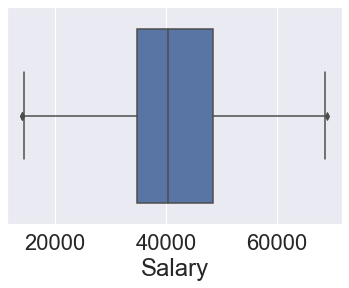

In [631]:
sns.boxplot(df2['Salary'])

## 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

__Scaling__
- Scaling is not required for the logistic regression model. Hence its not performed here

In [541]:
df2_bkp2=df2.copy()

__Encoding object data to Numerical__

In [542]:
df2.HolidayPackage.replace(['yes','no'],[1,0],inplace=True)
#df2.Foreign.replace(['yes','no'],[1,0],inplace=True)

/Users/balask/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [543]:
df2.HolidayPackage.value_counts()


0    426
1    389
Name: HolidayPackage, dtype: int64

In [544]:
df2.HolidayPackage.value_counts(normalize=True)

0    0.522699
1    0.477301
Name: HolidayPackage, dtype: float64

In [545]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 815 entries, 1 to 872
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   HolidayPackage     815 non-null    int64 
 1   Salary             815 non-null    int64 
 2   Age                815 non-null    int64 
 3   Educ               815 non-null    int64 
 4   No_young_children  815 non-null    int64 
 5   No_older_children  815 non-null    int64 
 6   Foreign            815 non-null    object
dtypes: int64(6), object(1)
memory usage: 50.9+ KB


In [546]:
df2 = pd.get_dummies(df2,drop_first=True)
df2.head()

,HolidayPackage,Salary,Age,Educ,No_young_children,No_older_children,Foreign_yes
1,0,48412,30,8,1,1,0
2,1,37207,45,8,0,1,0
3,0,58022,46,9,0,0,0
4,0,66503,31,11,2,0,0
5,0,66734,44,12,0,2,0


In [547]:
df2.Foreign_yes.value_counts()

0    604
1    211
Name: Foreign_yes, dtype: int64

In [548]:
df2.rename(columns={'Foreign_yes':'Foreign'},inplace=True)

In [549]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 815 entries, 1 to 872
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   HolidayPackage     815 non-null    int64
 1   Salary             815 non-null    int64
 2   Age                815 non-null    int64
 3   Educ               815 non-null    int64
 4   No_young_children  815 non-null    int64
 5   No_older_children  815 non-null    int64
 6   Foreign            815 non-null    uint8
dtypes: int64(6), uint8(1)
memory usage: 45.4 KB


__Train-Test Split__

In [550]:
# Copy all the predictor variables into X dataframe
#X = df2.drop(['HolidayPackage','Educ','No_older_children'], axis=1)
X = df2.drop(['HolidayPackage'], axis=1)
#X = df1[['carat','depth']]

# Copy target into the y dataframe. 
y = df2[['HolidayPackage']]

In [551]:
X.head()

,Salary,Age,Educ,No_young_children,No_older_children,Foreign
1,48412,30,8,1,1,0
2,37207,45,8,0,1,0
3,58022,46,9,0,0,0
4,66503,31,11,2,0,0
5,66734,44,12,0,2,0


In [552]:
from sklearn.model_selection import train_test_split
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=y)

In [553]:
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)
print (df2.shape)

(570, 6)
(245, 6)
(570, 1)
(245, 1)
(815, 7)


In [554]:
y_train.value_counts(normalize=True)

HolidayPackage
0                 0.522807
1                 0.477193
dtype: float64

# 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

__Logistic Regression Model__

__creating user define function so to run model multiple times for different grid search parameters__


In [555]:
def run_gridsearch(model,param_grid,X_train, train_labels,cv_value=5,scoring_value='accuracy'):
    grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = cv_value, n_jobs =-1,scoring=scoring_value)
    print ("\n Running grid search\n")
    grid_search.fit(X_train, train_labels)
    print ("\n Showing best parameters for the grid search\n")
    print (grid_search.best_params_)
    return grid_search

In [556]:
def check_performance(grid_search,X_train, X_test, train_labels, test_labels):
    best_grid = grid_search.best_estimator_
    ytrain_predict = best_grid.predict(X_train)
    ytest_predict = best_grid.predict(X_test)
    print("\n Classification Report for Train dataset\n")
    print(classification_report(train_labels,ytrain_predict))
    print("\n Classification Report for Test dataset\n")
    print(classification_report(test_labels,ytest_predict))

In [557]:
# Fit the Logistic Regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, y_train)

/Users/balask/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
/Users/balask/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/balask/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/balask/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', 

LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

__Predicting on Training and Test dataset__

In [558]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

__Getting the Predicted Classes and Probs__

In [559]:
ytest_predict_prob=model.predict_proba(X_test)
#pd.DataFrame(ytest_predict_prob).head()

__Model Evaluation__

In [560]:
# Accuracy - Training Data
print ('Model score for training dataset', model.score(X_train, y_train))
print ('Model score for training dataset',model.score(X_test, y_test))

Model score for training dataset 0.6526315789473685
Model score for training dataset 0.6857142857142857


__AUC and ROC for the training data & test data__

AUC for Train dataset: 0.722
AUC for test dataset: 0.722


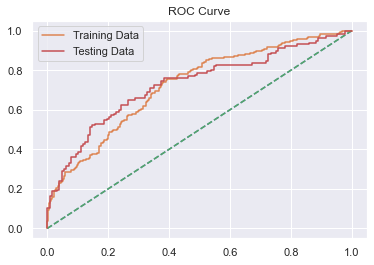

In [561]:
# predict probabilities
probs_train = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_train = probs_train[:, 1]
# calculate AUC
auc = metrics.roc_auc_score(y_train, probs_train)
print('AUC for Train dataset: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = metrics.roc_curve(y_train, probs_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr,label = 'Training Data')

# predict probabilities
probs_test = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_test = probs_test[:, 1]
# calculate AUC
test_auc = metrics.roc_auc_score(y_test, probs_test,)
print('AUC for test dataset: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = metrics.roc_curve(y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr,label = 'Testing Data')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

__Confusion Matrix for the training data and testing data__

In [562]:
confusion_matrix(y_train, ytrain_predict)

array([[216,  82],
       [116, 156]])

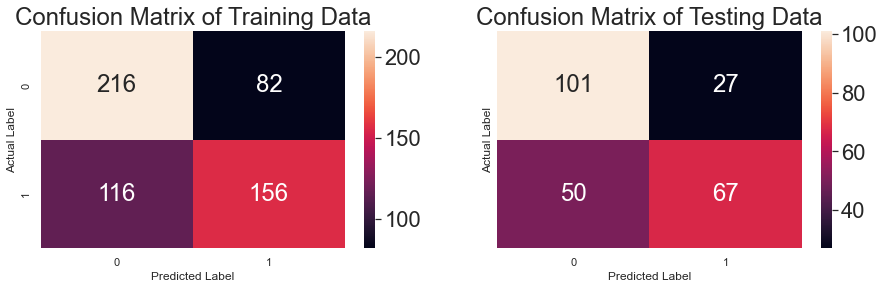

In [563]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False,figsize= (15,4))

#Plotting confusion matrix for the different models for the Training Data
sns.set(font_scale=2)
plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predict)),annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set(xlabel = "Predicted Label",ylabel="Actual Label")
a[0][0].set_title('Confusion Matrix of Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict)),annot=True,fmt='.5g',ax=a[0][1]);
a[0][1].set_title('Confusion Matrix of Testing Data')
a[0][1].set(xlabel = "Predicted Label",ylabel="Actual Label");

__Training Data and Test Data Classification Report Comparison__

In [564]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,ytrain_predict),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,ytest_predict),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.65      0.72      0.69       298
           1       0.66      0.57      0.61       272

    accuracy                           0.65       570
   macro avg       0.65      0.65      0.65       570
weighted avg       0.65      0.65      0.65       570
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.67      0.79      0.72       128
           1       0.71      0.57      0.64       117

    accuracy                           0.69       245
   macro avg       0.69      0.68      0.68       245
weighted avg       0.69      0.69      0.68       245
 



__Applying GridSearchCV for Logistic Regression__

In [565]:
grid={'penalty':['l2','none','l1'],   
      'solver':['lbfgs','liblinear'],   # 'newton-cg',
      'tol':[0.0001,0.00001]}

In [566]:
lr_model = LogisticRegression(max_iter=10000,n_jobs=-1)

In [567]:
#grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')
from sklearn.model_selection import GridSearchCV
cv_value=3
grid_search = run_gridsearch(lr_model,grid,X_train, y_train,cv_value)
check_performance(grid_search,X_train, X_test, y_train, y_test)
## Scoring - Strategy to evaluate the performance of the cross-validated model on the test set.


 Running grid search



/Users/balask/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/balask/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/balask/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/balask/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 


 Showing best parameters for the grid search

{'penalty': 'l1', 'solver': 'liblinear', 'tol': 1e-05}

 Classification Report for Train dataset

              precision    recall  f1-score   support

           0       0.64      0.75      0.69       298
           1       0.66      0.54      0.59       272

    accuracy                           0.65       570
   macro avg       0.65      0.64      0.64       570
weighted avg       0.65      0.65      0.64       570


 Classification Report for Test dataset

              precision    recall  f1-score   support

           0       0.66      0.81      0.73       128
           1       0.73      0.55      0.62       117

    accuracy                           0.69       245
   macro avg       0.69      0.68      0.68       245
weighted avg       0.69      0.69      0.68       245



In [568]:
best_model = grid_search.best_estimator_

__Prediction on the training set__

In [569]:
ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [570]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
#pd.DataFrame(ytest_predict_prob).head()

__Model Evaluation__

In [571]:
# Accuracy - Training Data
print ('Model score for training dataset', best_model.score(X_train, y_train))
print ('Model score for training dataset',best_model.score(X_test, y_test))

Model score for training dataset 0.6491228070175439
Model score for training dataset 0.6857142857142857


__AUC and ROC for the training data & test data__

AUC for Train dataset: 0.722
AUC for test dataset: 0.722


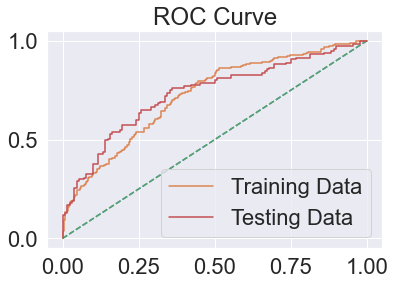

In [572]:
# predict probabilities
probs_train = best_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_train = probs_train[:, 1]
# calculate AUC
auc = metrics.roc_auc_score(y_train, probs_train)
print('AUC for Train dataset: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = metrics.roc_curve(y_train, probs_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr,label = 'Training Data')

# predict probabilities
probs_test = best_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_test = probs_test[:, 1]
# calculate AUC
test_auc = metrics.roc_auc_score(y_test, probs_test,)
print('AUC for test dataset: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = metrics.roc_curve(y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr,label = 'Testing Data')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

__Confusion Matrix for the training data and testing data__

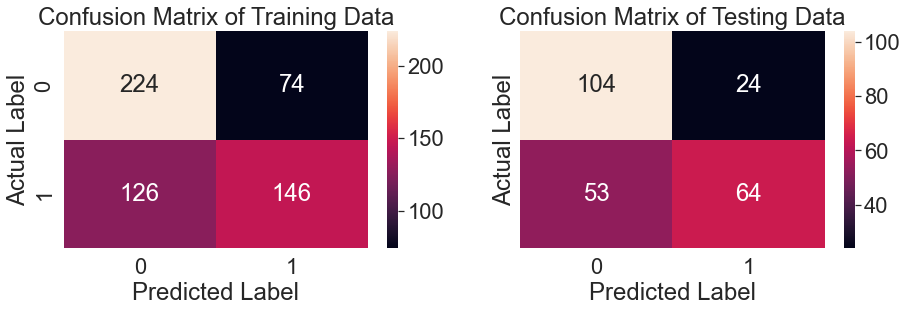

In [573]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False,figsize= (15,4))

#Plotting confusion matrix for the different models for the Training Data
sns.set(font_scale=2)
plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predict)),annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set(xlabel = "Predicted Label",ylabel="Actual Label")
a[0][0].set_title('Confusion Matrix of Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict)),annot=True,fmt='.5g',ax=a[0][1]);
a[0][1].set_title('Confusion Matrix of Testing Data')
a[0][1].set(xlabel = "Predicted Label",ylabel="Actual Label");

__Training Data and Test Data Classification Report Comparison__

In [574]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,ytrain_predict),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,ytest_predict),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.64      0.75      0.69       298
           1       0.66      0.54      0.59       272

    accuracy                           0.65       570
   macro avg       0.65      0.64      0.64       570
weighted avg       0.65      0.65      0.64       570
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.66      0.81      0.73       128
           1       0.73      0.55      0.62       117

    accuracy                           0.69       245
   macro avg       0.69      0.68      0.68       245
weighted avg       0.69      0.69      0.68       245
 



__Getting the equation__

In [575]:
## Import the model
import statsmodels.formula.api as sm

In [576]:
df2.columns

Index(['HolidayPackage', 'Salary', 'Age', 'Educ', 'No_young_children',
       'No_older_children', 'Foreign'],
      dtype='object')

In [577]:
A1 = 'HolidayPackage ~Salary+Age+Educ+No_young_children+No_older_children+Foreign'

In [578]:
model_1 = sm.logit(formula =A1, data =df2).fit()
model_1.summary()

Optimization terminated successfully.
         Current function value: 0.612152
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         HolidayPackage   No. Observations:                  815
Model:                          Logit   Df Residuals:                      808
Method:                           MLE   Df Model:                            6
Date:                Sun, 03 Jul 2022   Pseudo R-squ.:                  0.1155
Time:                        12:47:46   Log-Likelihood:                -498.90
converged:                       True   LL-Null:                       -564.07
Covariance Type:            nonrobust   LLR p-value:                 1.089e-25
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.2299      0.592      3.767      0.000       1.070       3.390
Salary            -1.513e-05   6.24e-06     -2.425      0.015   -2.74e-05    -2.9e-06
Age                  -0.0475      0.009     -5.142      0.000      -0.066      -0.029
Educ                  0.0323      0.030      1.064      0.287      -0.027       0.092
No_young_children    -1.3284      0.183     -7.268      0.000      -1.687      -0.970
No_older_children    -0.0171      0.076     -0.226      0.822      -0.166       0.132
Foreign               1.3357      0.207      6.461      0.000       0.931       1.741
=====================================================================================
"""

- We can see that the p value of No_older_children is the highest (.822) and it is greator than 0.05.

- Hence it confirms that No_older_children attribute has no impact on dependent variable HolidayPackage

In [579]:
A1 = 'HolidayPackage ~Salary+Age+Educ+No_young_children+Foreign'
model_1 = sm.logit(formula =A1, data =df2).fit()
model_1.summary()

Optimization terminated successfully.
         Current function value: 0.612183
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         HolidayPackage   No. Observations:                  815
Model:                          Logit   Df Residuals:                      809
Method:                           MLE   Df Model:                            5
Date:                Sun, 03 Jul 2022   Pseudo R-squ.:                  0.1155
Time:                        12:47:47   Log-Likelihood:                -498.93
converged:                       True   LL-Null:                       -564.07
Covariance Type:            nonrobust   LLR p-value:                 2.065e-26
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.1886      0.562      3.891      0.000       1.086       3.291
Salary            -1.538e-05   6.14e-06     -2.506      0.012   -2.74e-05   -3.35e-06
Age                  -0.0469      0.009     -5.325      0.000      -0.064      -0.030
Educ                  0.0330      0.030      1.092      0.275      -0.026       0.092
No_young_children    -1.3145      0.172     -7.658      0.000      -1.651      -0.978
Foreign               1.3347      0.207      6.459      0.000       0.930       1.740
=====================================================================================
"""

- We can see that the p value of Educ is the highest (.275) and it is greator than 0.05.

- Hence it confirms that Educ attribute has no impact on dependent variable HolidayPackage

In [580]:
A1 = 'HolidayPackage ~Salary+Age+No_young_children+Foreign'
model_1 = sm.logit(formula =A1, data =df2).fit()
model_1.summary()

Optimization terminated successfully.
         Current function value: 0.612917
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         HolidayPackage   No. Observations:                  815
Model:                          Logit   Df Residuals:                      810
Method:                           MLE   Df Model:                            4
Date:                Sun, 03 Jul 2022   Pseudo R-squ.:                  0.1144
Time:                        12:47:48   Log-Likelihood:                -499.53
converged:                       True   LL-Null:                       -564.07
Covariance Type:            nonrobust   LLR p-value:                 6.083e-27
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.5092      0.481      5.217      0.000       1.566       3.452
Salary            -1.377e-05   5.94e-06     -2.317      0.021   -2.54e-05   -2.12e-06
Age                  -0.0485      0.009     -5.601      0.000      -0.066      -0.032
No_young_children    -1.3078      0.172     -7.618      0.000      -1.644      -0.971
Foreign               1.2434      0.188      6.617      0.000       0.875       1.612
=====================================================================================
"""

- Now all p values are less than 0.05. Hence all these attributes and their coeffficients have importance in deciding the target variable HolidayPackage.

- Also we can see that coef value is highest for No_young_children followed by foreign, Age and salary

- Salary coefficient value is very low i.e -00001377. So its impact is almost 0 on dependent variable

In [581]:
model_1.params

Intercept            2.509151
Salary              -0.000014
Age                 -0.048540
No_young_children   -1.307750
Foreign              1.243389
dtype: float64

In [592]:
for i,j in np.array(model_1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(2.51) * Intercept + (-0.0) * Salary + (-0.05) * Age + (-1.31) * No_young_children + (1.24) * Foreign + 

__Logistics Regression Conclusion__

Train Data:

- AUC: 72%

- Accuracy: 65%

- Precision: 66%

- f1-Score: 59%

- Recall: 54%

Test Data:

- AUC: 72%

- Accuracy: 69%

- Precision: 73%

- f1-Score: 62%

- Recall: 55%

__Train and Test dataset have similar statistics, hence model is giving similar result for test and train data set..__

- With accuracy of 69% and recall rate of 55%, model is only able to predict 55% of total tours which were actually claimed as claimed.

- Precision is 73% of test data which means, out of total employees predicted by model as opt for tour, 73% employees actually opted for the tour

- F1-score is the harmonic mean of precision and recall, it takes into the effect of both the scores and this value is low if any of these 2 value is low.

- Since we are building a model to predict if whether employee will opt for tour or not, for practical purposes, we will be more interested in correctly classifying 1 (employees opting for tour) than 0(employees not opting for tour).

- If a employee not opting for tour is incorrectly predicted to be "opted for tour" by the model, then the impact on cost for the travel company would be bare minimum. But if am employee opted for tour is incorrectly predicted to be not opted by the model, then the cost impact would be very high for the tour and travel company. Its a loss of potential lead for the company. Hence recall rate (actual data point identified as True by model) is very important in this scenario.

__As Recall rate of test dataset is very poor around 52% thus this doesnt looks good enough for classification
Logistic regression equation is as shown below :-__

- Log (odd) = (2.51) + (-0.0) Salary + (-0.05) Age + (-1.31) No_young_children + (1.24) Foreign

- We can see that salary coefficient is very small , this it can be removed. So our equation would become :-

- Log (odd) = (2.51) + (-0.05) Age + (-1.31) No_young_children + (1.214) * Foreign

- Most important attribute here is No of young children followed by Foreign and age

__LDA Model__

In [593]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [594]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,y_train)

/Users/balask/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


__Prediction__

In [595]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

__Training Data and Test Data Confusion Matrix Comparison__

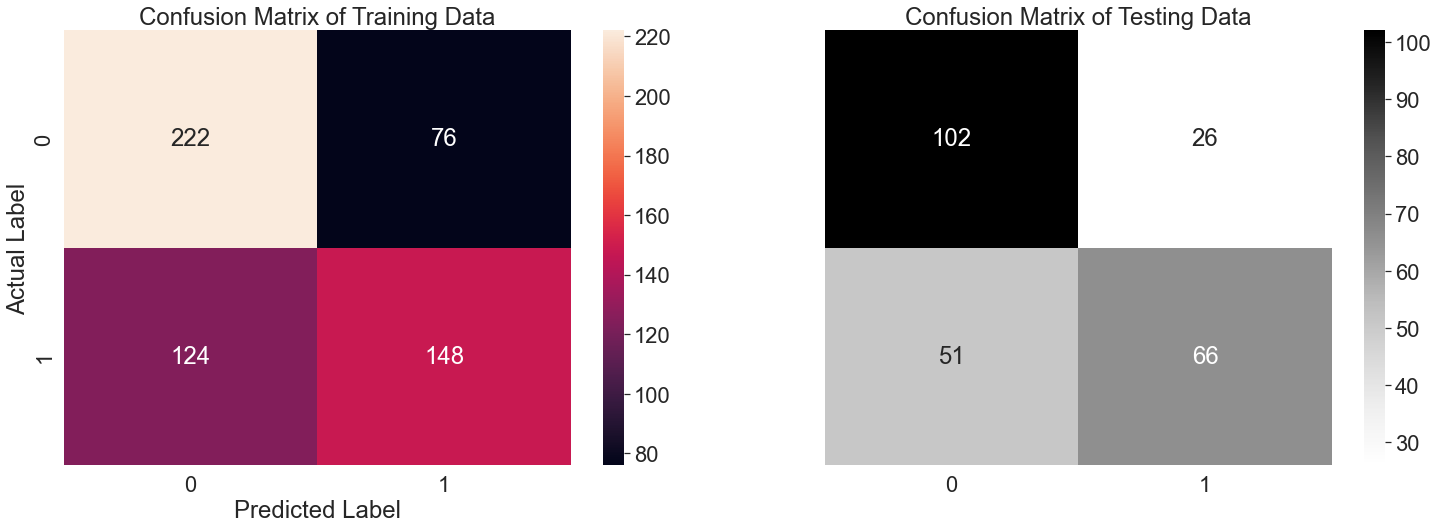

In [596]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False,figsize= (25,8))

#Plotting confusion matrix for the different models for the Training Data
sns.set(font_scale=2)
plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set(xlabel = "Predicted Label",ylabel="Actual Label")
a[0][0].set_title('Confusion Matrix of Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Confusion Matrix of Testing Data')
a[0][0].set(xlabel = "Predicted Label",ylabel="Actual Label");

__Training Data and Test Data Classification Report Comparison__

In [597]:

print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.64      0.74      0.69       298
           1       0.66      0.54      0.60       272

    accuracy                           0.65       570
   macro avg       0.65      0.64      0.64       570
weighted avg       0.65      0.65      0.65       570
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.67      0.80      0.73       128
           1       0.72      0.56      0.63       117

    accuracy                           0.69       245
   macro avg       0.69      0.68      0.68       245
weighted avg       0.69      0.69      0.68       245
 



__Probability prediction for the training and test data__

In [598]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

AUC for the Training Data: 0.721
AUC for the Test Data: 0.730


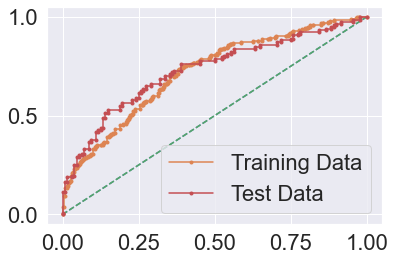

In [601]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

__LDA Conclusion__

Train Data:

- AUC: 72%

- Accuracy: 65%

- Precision: 66%

- f1-Score: 60%

- Recall: 54%

Test Data:

- AUC: 73%

- Accuracy: 69%

- Precision: 72%

- f1-Score: 63%

- Recall: 56%

__Train and Test dataset have similar statistics, hence model is giving similar result for test and train data set..__

- With accuracy of 73% and recall rate of 56%, model is only able to predict 54% of total tours which were actually claimed as claimed.

- Precision is 72% of test data which means, out of total employees predicted by model as opt for tour, 72% employees actually opted for the tour

- F1-score is the harmonic mean of precision and recall, it takes into the effect of both the scores and this value is low if any of these 2 value is low.

- Since we are building a model to predict if whether employee will opt for tour or not, for practical purposes, we will be more interested in correctly classifying 1 (employees opting for tour) than 0(employees not opting for tour).

- If a employee not opting for tour is incorrectly predicted to be "opted for tour" by the model, then the impact on cost for the travel company would be bare minimum. But if am employee opted for tour is incorrectly predicted to be not opted by the model, then the cost impact would be very high for the tour and travel company. Its a loss of potential lead for the company. Hence recall rate (actual data point identified as True by model) is very important in this scenario.

- As Recall rate of test dataset is very poor around 56% thus this doesnt looks good enough for classification

__Running other Classification models__

__Scaling__

In [602]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler() 

In [603]:
# we are scaling the data for ANN. Without scaling it will give very poor results. Computations becomes easier
x_train_scaled=ss.fit_transform(X_train)
x_test_scaled=ss.transform(X_test)
print (x_train_scaled.shape)
print (X_train.shape)
print (x_test_scaled.shape)
print (X_test.shape)

(570, 6)
(570, 6)
(245, 6)
(245, 6)


In [604]:
x_train_scaled[0]

array([ 1.71562193, -0.611459  ,  0.93108671,  1.10473477, -0.90176585,
       -0.58950634])

In [605]:
X_train_bkp=X_train.copy()
X_test_bkp=X_test.copy()

__Train and test dataframe have been scaled now__

Make 4 models using ANN, Decision Tree, Random Forest, and Linear Regression

- Check Train and Test AUC
- Check Train and Test Scores

In [606]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [607]:
lgr = LogisticRegression(penalty='l1', solver='liblinear',tol=0.0001,verbose=True,n_jobs=-1,random_state=1)
lda = LinearDiscriminantAnalysis()
anncl = MLPClassifier(hidden_layer_sizes=(500),random_state=1, max_iter=10000)#you are free to tweak the layer sizes
rfcl = RandomForestClassifier(random_state=1)
dtcl = DecisionTreeClassifier(random_state=1)

In [608]:
def extract_classfication_meterics(y,y_predict):
    df_metrics=classification_report(y, y_predict,output_dict=True)
    #print(classification_report(y, y_predict))
    df_metrics=pd.DataFrame(df_metrics).transpose()
    precision = round(df_metrics.loc["1"][0],2)
    recall = round(df_metrics.loc["1"][1],2)
    f1 = round(df_metrics.loc["1"][2],2)
    return precision, recall, f1

In [609]:
models=[lgr,lda,dtcl,rfcl,anncl]
#models=[lgr,ldar]
modelnames = ['LogR','LDA','DT','RF','ANN']
j=0
scores_train=[]
scores_test=[]
precision_train=[]
precision_test=[]
recall_train=[]
recall_test=[]
f1_train=[]
f1_test=[]
auc_train=[]
auc_test=[]
train_fpr=[]
test_fpr=[]
train_tpr=[]
test_tpr=[]
train_thresholds=[]
test_thresholds=[]

for i in models:  
# we are scaling the data for ANN. Without scaling it will give very poor results. Computations becomes easier
    
    if (i != anncl):       
        i.fit(X_train,y_train)
        ytrain_predict = i.predict(X_train)
        ytest_predict = i.predict(X_test)
        X_train_bkp["predicted_"+modelnames[j]] = ytrain_predict
        X_test_bkp["predicted_"+modelnames[j]] =ytest_predict
        
        scores_train.append(round(i.score(X_train, y_train),2))
        scores_test.append(round(i.score(X_test, y_test),2))
        
        precision, recall, f1 = extract_classfication_meterics(y_train,ytrain_predict)
        precision_train.append(precision)
        recall_train.append(recall)
        f1_train.append(f1)

        precision, recall, f1 = extract_classfication_meterics(y_test,ytest_predict)
        precision_test.append(precision)
        recall_test.append(recall)
        f1_test.append(f1)
       
        auc_train.append(round(metrics.roc_auc_score(y_train, i.predict_proba(X_train)[:, 1]),2))
        auc_test.append(round(metrics.roc_auc_score(y_test, i.predict_proba(X_test)[:, 1]),2))

        fpr, tpr, thresholds = metrics.roc_curve(y_train, i.predict_proba(X_train)[:, 1])
        train_fpr.append(fpr)
        train_tpr.append(tpr)
        train_thresholds.append(thresholds)           
        
        fpr, tpr, thresholds = metrics.roc_curve(y_test, i.predict_proba(X_test)[:, 1])
        test_fpr.append(fpr)
        test_tpr.append(tpr)
        test_thresholds.append(thresholds)           
        
    else:                         
        i.fit(x_train_scaled,y_train)
        ytrain_predict = i.predict(x_train_scaled)
        ytest_predict = i.predict(x_test_scaled)
        X_train_bkp["predicted_"+modelnames[j]] = ytrain_predict
        X_test_bkp["predicted_"+modelnames[j]] =ytest_predict
        
        scores_train.append(round(i.score(x_train_scaled, y_train),2))
        scores_test.append(round(i.score(x_test_scaled, y_test),2))
        
        precision, recall, f1 = extract_classfication_meterics(y_train,ytrain_predict)
        precision_train.append(precision)
        recall_train.append(recall)
        f1_train.append(f1)

        precision, recall, f1 = extract_classfication_meterics(y_test,ytest_predict)
        precision_test.append(precision)
        recall_test.append(recall)
        f1_test.append(f1)
       
        auc_train.append(round(metrics.roc_auc_score(y_train, i.predict_proba(x_train_scaled)[:, 1]),2))
        auc_test.append(round(metrics.roc_auc_score(y_test, i.predict_proba(x_test_scaled)[:, 1]),2))

        fpr, tpr, thresholds = metrics.roc_curve(y_train, i.predict_proba(x_train_scaled)[:, 1])
        train_fpr.append(fpr)
        train_tpr.append(tpr)
        train_thresholds.append(thresholds)           

        fpr, tpr, thresholds = metrics.roc_curve(y_test, i.predict_proba(x_test_scaled)[:, 1])
        test_fpr.append(fpr)
        test_tpr.append(tpr)
        test_thresholds.append(thresholds)           
        
    j=j+1

/Users/balask/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/balask/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn("'n_jobs' > 1 does not have any effect when"
/Users/balask/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/var/folders/0f/l_gpn8zs23g2ks0py8f54x9c0000gn/T/ipykernel_2435/1238919926.py:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

[LibLinear]iter   1  #CD cycles 2
iter   2  #CD cycles 1
iter   3  #CD cycles 1
iter   4  #CD cycles 4
iter   5  #CD cycles 1
iter   6  #CD cycles 8
iter   7  #CD cycles 9
iter   8  #CD cycles 1
iter   9  #CD cycles 2
iter  10  #CD cycles 19
iter  11  #CD cycles 9
iter  12  #CD cycles 5
iter  13  #CD cycles 8
iter  14  #CD cycles 2
iter  15  #CD cycles 4
iter  16  #CD cycles 2
iter  17  #CD cycles 1
iter  18  #CD cycles 1
iter  19  #CD cycles 83
iter  20  #CD cycles 11
iter  21  #CD cycles 12
iter  22  #CD cycles 3
iter  23  #CD cycles 78
iter  24  #CD cycles 2
iter  25  #CD cycles 1
optimization finished, #iter = 25
Objective value = 354.672598
#nonzeros/#features = 6/7


/Users/balask/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [610]:
scores_train

[0.65, 0.65, 1.0, 1.0, 0.89]

In [611]:
df2_meteric_comp=(pd.DataFrame({'Train Accuracy': scores_train,'Test Accuracy': scores_test,'Train AUC':auc_train,'Test AUC': auc_test,'Train Recall':recall_train,'Test Recall': recall_test,'Train precision':precision_train,'Test precision': precision_test,'Train f1':f1_train,'Test f1': f1_test},
            index=['Logistic Regression','LDA','Decision Tree','Random Forest', 'ANN']))
#            index=['Logistic Regression','LDA']))
df2_meteric_comp     

,Train Accuracy,Test Accuracy,Train AUC,Test AUC,Train Recall,Test Recall,Train precision,Test precision,Train f1,Test f1
Logistic Regression,0.65,0.69,0.72,0.73,0.54,0.56,0.66,0.73,0.60,0.63
LDA,0.65,0.69,0.72,0.73,0.54,0.56,0.66,0.72,0.60,0.63
Decision Tree,1.00,0.60,1.00,0.60,1.00,0.61,1.00,0.58,1.00,0.59
Random Forest,1.00,0.66,1.00,0.71,1.00,0.63,1.00,0.64,1.00,0.64
ANN,0.89,0.65,0.96,0.71,0.88,0.60,0.89,0.65,0.89,0.62


__Running Grid search for Decision Tree__

In [612]:
dt_model = DecisionTreeClassifier(random_state=1)
cv_value = 3
param_grid = {
    'max_depth': [3,4], #[6,7, 13, 20],
    'min_samples_leaf': [4], #[3,5,7,10],
    'min_samples_split': [66,67,68] #[30,40,50,60,75,80,85,90,95]
}
grid_search = run_gridsearch(dt_model,param_grid,X_train, y_train,cv_value)
check_performance(grid_search,X_train, X_test, y_train, y_test)


 Running grid search


 Showing best parameters for the grid search

{'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 66}

 Classification Report for Train dataset

              precision    recall  f1-score   support

           0       0.69      0.70      0.70       298
           1       0.67      0.66      0.66       272

    accuracy                           0.68       570
   macro avg       0.68      0.68      0.68       570
weighted avg       0.68      0.68      0.68       570


 Classification Report for Test dataset

              precision    recall  f1-score   support

           0       0.66      0.74      0.70       128
           1       0.68      0.59      0.63       117

    accuracy                           0.67       245
   macro avg       0.67      0.67      0.67       245
weighted avg       0.67      0.67      0.67       245



__Running Grid search for Random Forest__

In [613]:
cv_value=3
param_grid = {
    'max_depth': [4], # 3,5
    'max_features': [3], #5,4,2
    'min_samples_leaf': [8], #4,9,7
    'min_samples_split': [56], #100,70,62,61,54,55,58,59
    'n_estimators': [480,490,493]
}

grid_search = run_gridsearch(rfcl,param_grid,X_train, y_train,cv_value)

check_performance(grid_search,X_train, X_test, y_train, y_test)


 Running grid search



/Users/balask/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/balask/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/balask/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/balask/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation


 Showing best parameters for the grid search

{'max_depth': 4, 'max_features': 3, 'min_samples_leaf': 8, 'min_samples_split': 56, 'n_estimators': 480}

 Classification Report for Train dataset

              precision    recall  f1-score   support

           0       0.74      0.69      0.71       298
           1       0.68      0.73      0.71       272

    accuracy                           0.71       570
   macro avg       0.71      0.71      0.71       570
weighted avg       0.71      0.71      0.71       570


 Classification Report for Test dataset

              precision    recall  f1-score   support

           0       0.70      0.76      0.73       128
           1       0.71      0.64      0.67       117

    accuracy                           0.70       245
   macro avg       0.70      0.70      0.70       245
weighted avg       0.70      0.70      0.70       245



__Running Grid search for ANN__

In [614]:
param_grid = {
    'hidden_layer_sizes': [200,500,(100,100),], #(100,100,100)
    'activation': [ 'relu'],  #'logistic',
    'solver': [ 'adam'], #'sgd',
    'tol': [0.001],  #0.01
    'max_iter' : [10000],
    'verbose':[True]
}

grid_search = run_gridsearch(anncl,param_grid,x_train_scaled, y_train,cv_value)

check_performance(grid_search,x_train_scaled, x_test_scaled, y_train, y_test)


 Running grid search



/Users/balask/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/balask/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/balask/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/balask/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

Iteration 1, loss = 0.69360392
Iteration 2, loss = 0.67831942
Iteration 3, loss = 0.66671917
Iteration 4, loss = 0.65625523
Iteration 5, loss = 0.64826650
Iteration 6, loss = 0.64096714
Iteration 7, loss = 0.63515642
Iteration 8, loss = 0.63023362
Iteration 9, loss = 0.62605355
Iteration 10, loss = 0.62229492
Iteration 11, loss = 0.61942120
Iteration 12, loss = 0.61628624
Iteration 13, loss = 0.61342875
Iteration 14, loss = 0.61112494
Iteration 15, loss = 0.60877471
Iteration 16, loss = 0.60710741
Iteration 17, loss = 0.60505121
Iteration 18, loss = 0.60334325
Iteration 19, loss = 0.60180053
Iteration 20, loss = 0.60053321
Iteration 21, loss = 0.59919953
Iteration 22, loss = 0.59782244
Iteration 23, loss = 0.59675604
Iteration 24, loss = 0.59567283
Iteration 25, loss = 0.59456494
Iteration 26, loss = 0.59355918
Iteration 27, loss = 0.59272563
Iteration 28, loss = 0.59165174
Iteration 29, loss = 0.59081079
Iteration 30, loss = 0.59019998
Iteration 31, loss = 0.58920893
Iteration 32, los

/Users/balask/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


__Putting pruned parameters to the classification models__

In [615]:
lgr = LogisticRegression(penalty='l1', solver='liblinear',tol=0.0001,verbose=True,n_jobs=-1,random_state=1)
lda = LinearDiscriminantAnalysis()
anncl = MLPClassifier(random_state=1,activation='relu',hidden_layer_sizes=(100,100),max_iter=10000,solver='adam',tol=0.001,verbose=True)#you are free to tweak the layer sizes
rfcl = RandomForestClassifier(random_state=1,max_depth=4,max_features=3,min_samples_leaf=8,n_estimators=490)
dtcl = DecisionTreeClassifier(random_state=1,max_depth=4,min_samples_leaf=4,min_samples_split=67)

In [616]:
models=[lgr,lda,dtcl,rfcl,anncl]
#models=[lgr,ldar]
modelnames = ['LogR','LDA','DT','RF','ANN']
j=0
scores_train=[]
scores_test=[]
precision_train=[]
precision_test=[]
recall_train=[]
recall_test=[]
f1_train=[]
f1_test=[]
auc_train=[]
auc_test=[]
train_fpr=[]
test_fpr=[]
train_tpr=[]
test_tpr=[]
train_thresholds=[]
test_thresholds=[]

for i in models:  
# we are scaling the data for ANN. Without scaling it will give very poor results. Computations becomes easier
    print (modelnames[j])
    if (i != anncl):       
        i.fit(X_train,y_train)
        scores_train.append(round(i.score(X_train, y_train),2))
        scores_test.append(round(i.score(X_test, y_test),2))

        print(i)
        ytrain_predict = i.predict(X_train)
        ytest_predict = i.predict(X_test)
        X_train_bkp["predicted_"+modelnames[j]] = ytrain_predict
        X_test_bkp["predicted_"+modelnames[j]] =ytest_predict
        
        
        precision, recall, f1 = extract_classfication_meterics(y_train,ytrain_predict)
        precision_train.append(precision)
        recall_train.append(recall)
        f1_train.append(f1)

        precision, recall, f1 = extract_classfication_meterics(y_test,ytest_predict)
        precision_test.append(precision)
        recall_test.append(recall)
        f1_test.append(f1)
       
        auc_train.append(round(metrics.roc_auc_score(y_train, i.predict_proba(X_train)[:, 1]),2))
        auc_test.append(round(metrics.roc_auc_score(y_test, i.predict_proba(X_test)[:, 1]),2))

        fpr, tpr, thresholds = metrics.roc_curve(y_train, i.predict_proba(X_train)[:, 1])
        train_fpr.append(fpr)
        train_tpr.append(tpr)
        train_thresholds.append(thresholds)           
        
        fpr, tpr, thresholds = metrics.roc_curve(y_test, i.predict_proba(X_test)[:, 1])
        test_fpr.append(fpr)
        test_tpr.append(tpr)
        test_thresholds.append(thresholds)           
        
    else:                         
        i.fit(x_train_scaled,y_train)
        ytrain_predict = i.predict(x_train_scaled)
        ytest_predict = i.predict(x_test_scaled)
        X_train_bkp["predicted_"+modelnames[j]] = ytrain_predict
        X_test_bkp["predicted_"+modelnames[j]] =ytest_predict
        
        scores_train.append(round(i.score(x_train_scaled, y_train),2))
        scores_test.append(round(i.score(x_test_scaled, y_test),2))
        
        precision, recall, f1 = extract_classfication_meterics(y_train,ytrain_predict)
        precision_train.append(precision)
        recall_train.append(recall)
        f1_train.append(f1)

        precision, recall, f1 = extract_classfication_meterics(y_test,ytest_predict)
        precision_test.append(precision)
        recall_test.append(recall)
        f1_test.append(f1)
       
        auc_train.append(round(metrics.roc_auc_score(y_train, i.predict_proba(x_train_scaled)[:, 1]),2))
        auc_test.append(round(metrics.roc_auc_score(y_test, i.predict_proba(x_test_scaled)[:, 1]),2))

        fpr, tpr, thresholds = metrics.roc_curve(y_train, i.predict_proba(x_train_scaled)[:, 1])
        train_fpr.append(fpr)
        train_tpr.append(tpr)
        train_thresholds.append(thresholds)           

        fpr, tpr, thresholds = roc_curve(y_test, i.predict_proba(x_test_scaled)[:, 1])
        test_fpr.append(fpr)
        test_tpr.append(tpr)
        test_thresholds.append(thresholds)           
        
    j=j+1

LogR
[LibLinear]iter   1  #CD cycles 2
iter   2  #CD cycles 1
iter   3  #CD cycles 1
iter   4  #CD cycles 4
iter   5  #CD cycles 1
iter   6  #CD cycles 8
iter   7  #CD cycles 9
iter   8  #CD cycles 1
iter   9  #CD cycles 2
iter  10  #CD cycles 19
iter  11  #CD cycles 9
iter  12  #CD cycles 5
iter  13  #CD cycles 8
iter  14  #CD cycles 2
iter  15  #CD cycles 4
iter  16  #CD cycles 2
iter  17  #CD cycles 1
iter  18  #CD cycles 1
iter  19  #CD cycles 83
iter  20  #CD cycles 11
iter  21  #CD cycles 12
iter  22  #CD cycles 3
iter  23  #CD cycles 78
iter  24  #CD cycles 2
iter  25  #CD cycles 1
optimization finished, #iter = 25
Objective value = 354.672598
#nonzeros/#features = 6/7
LogisticRegression(n_jobs=-1, penalty='l1', random_state=1, solver='liblinear',
                   verbose=True)
LDA
LinearDiscriminantAnalysis()
DT
DecisionTreeClassifier(max_depth=4, min_samples_leaf=4, min_samples_split=67,
                       random_state=1)
RF


/Users/balask/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/balask/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn("'n_jobs' > 1 does not have any effect when"
/Users/balask/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/var/folders/0f/l_gpn8zs23g2ks0py8f54x9c0000gn/T/ipykernel_2435/3233064302.py:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

RandomForestClassifier(max_depth=4, max_features=3, min_samples_leaf=8,
                       n_estimators=490, random_state=1)
ANN
Iteration 1, loss = 0.70538456
Iteration 2, loss = 0.67950422


/Users/balask/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Iteration 3, loss = 0.66288329
Iteration 4, loss = 0.64885320
Iteration 5, loss = 0.63774384
Iteration 6, loss = 0.63000241
Iteration 7, loss = 0.62145385
Iteration 8, loss = 0.61668028
Iteration 9, loss = 0.61123853
Iteration 10, loss = 0.60766573
Iteration 11, loss = 0.60402232
Iteration 12, loss = 0.60127532
Iteration 13, loss = 0.59794161
Iteration 14, loss = 0.59574911
Iteration 15, loss = 0.59363489
Iteration 16, loss = 0.59114880
Iteration 17, loss = 0.58911185
Iteration 18, loss = 0.58731919
Iteration 19, loss = 0.58507475
Iteration 20, loss = 0.58357458
Iteration 21, loss = 0.58178023
Iteration 22, loss = 0.58011173
Iteration 23, loss = 0.57861821
Iteration 24, loss = 0.57709783
Iteration 25, loss = 0.57530440
Iteration 26, loss = 0.57384750
Iteration 27, loss = 0.57236929
Iteration 28, loss = 0.57075744
Iteration 29, loss = 0.56929842
Iteration 30, loss = 0.56793149
Iteration 31, loss = 0.56699722
Iteration 32, loss = 0.56485524
Iteration 33, loss = 0.56391549
Iteration 34, l

Iteration 290, loss = 0.33972854
Iteration 291, loss = 0.33773181
Iteration 292, loss = 0.33982882
Iteration 293, loss = 0.34045907
Iteration 294, loss = 0.33614941
Iteration 295, loss = 0.33636410
Iteration 296, loss = 0.33562026
Iteration 297, loss = 0.33460800
Iteration 298, loss = 0.33401730
Iteration 299, loss = 0.33373647
Iteration 300, loss = 0.33305110
Iteration 301, loss = 0.33157190
Iteration 302, loss = 0.33619880
Iteration 303, loss = 0.33284247
Iteration 304, loss = 0.33058758
Iteration 305, loss = 0.32907318
Iteration 306, loss = 0.32882532
Iteration 307, loss = 0.32715796
Iteration 308, loss = 0.32657817
Iteration 309, loss = 0.32640515
Iteration 310, loss = 0.32518685
Iteration 311, loss = 0.32541289
Iteration 312, loss = 0.32632154
Iteration 313, loss = 0.32291180
Iteration 314, loss = 0.32261199
Iteration 315, loss = 0.32766009
Iteration 316, loss = 0.32209918
Iteration 317, loss = 0.32486437
Iteration 318, loss = 0.32154713
Iteration 319, loss = 0.32303218
Iteration 

Iteration 553, loss = 0.20747059
Iteration 554, loss = 0.20664742
Iteration 555, loss = 0.20412378
Iteration 556, loss = 0.20666541
Iteration 557, loss = 0.20395997
Iteration 558, loss = 0.20497662
Iteration 559, loss = 0.20486755
Iteration 560, loss = 0.20365281
Iteration 561, loss = 0.20429394
Iteration 562, loss = 0.20330424
Iteration 563, loss = 0.20136691
Iteration 564, loss = 0.20096764
Iteration 565, loss = 0.20127214
Iteration 566, loss = 0.20189134
Iteration 567, loss = 0.20185052
Iteration 568, loss = 0.20140213
Iteration 569, loss = 0.20160915
Iteration 570, loss = 0.19956750
Iteration 571, loss = 0.20050947
Iteration 572, loss = 0.19808645
Iteration 573, loss = 0.19977540
Iteration 574, loss = 0.19822287
Iteration 575, loss = 0.19845069
Iteration 576, loss = 0.19738091
Iteration 577, loss = 0.19858826
Iteration 578, loss = 0.19650219
Iteration 579, loss = 0.20360632
Iteration 580, loss = 0.19520799
Iteration 581, loss = 0.19918135
Iteration 582, loss = 0.19749144
Iteration 

NameError: name 'roc_curve' is not defined

In [ ]:
plt.figure(figsize=(10 ,7))
plt.plot([0, 1], [0, 1], linestyle='--')
j=0
for i in range(0,5):
    plt.plot(train_fpr[i], train_tpr[i],label = modelnames[j])
    print ('AUC for',modelnames[j],'is:',auc_train[j])
    j=j+1
plt.title('ROC Curve for Train dataset')
plt.legend(loc='best')
plt.show()

AUC for LogR is: 0.73
AUC for LDA is: 0.73
AUC for DT is: 0.73
AUC for RF is: 0.74


IndexError: list index out of range

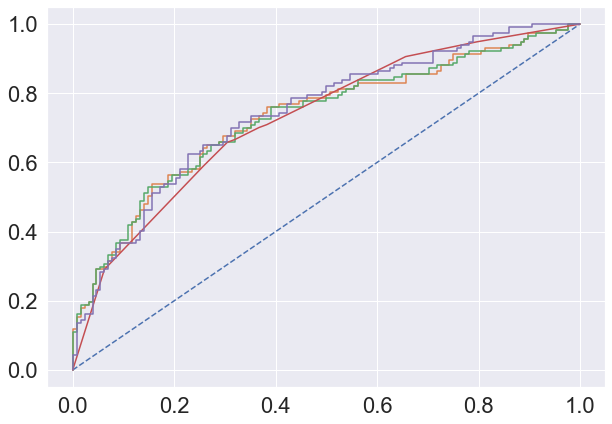

In [617]:
plt.figure(figsize=(10 ,7))
plt.plot([0, 1], [0, 1], linestyle='--')
j=0
for i in range(0,5):
    plt.plot(test_fpr[i], test_tpr[i],label = modelnames[j])
    print ('AUC for',modelnames[j],'is:',auc_test[j])
    j=j+1
plt.title('ROC Curve for Test dataset')
plt.legend(loc='best')
plt.show()

In [618]:
df2_meteric_comp=(pd.DataFrame({'Train Accuracy': scores_train,'Test Accuracy': scores_test,'Train AUC':auc_train,'Test AUC': auc_test,'Train Recall':recall_train,'Test Recall': recall_test,'Train precision':precision_train,'Test precision': precision_test,'Train f1':f1_train,'Test f1': f1_test},
            index=['Logistic Regression','LDA','Decision Tree','Random Forest', 'ANN']))
#            index=['Logistic Regression','LDA']))
df2_meteric_comp.iloc[0:2,:].T              

,Logistic Regression,LDA
Train Accuracy,0.65,0.65
Test Accuracy,0.69,0.69
Train AUC,0.72,0.72
Test AUC,0.73,0.73
Train Recall,0.54,0.54
Test Recall,0.56,0.56
Train precision,0.66,0.66
Test precision,0.73,0.72
Train f1,0.60,0.60
Test f1,0.63,0.63


In [619]:
df2_meteric_comp.T

,Logistic Regression,LDA,Decision Tree,Random Forest,ANN
Train Accuracy,0.65,0.65,0.68,0.72,0.95
Test Accuracy,0.69,0.69,0.67,0.69,0.58
Train AUC,0.72,0.72,0.75,0.80,0.99
Test AUC,0.73,0.73,0.73,0.74,0.63
Train Recall,0.54,0.54,0.66,0.74,0.93
Test Recall,0.56,0.56,0.59,0.62,0.52
Train precision,0.66,0.66,0.67,0.70,0.95
Test precision,0.73,0.72,0.68,0.70,0.56
Train f1,0.60,0.60,0.66,0.72,0.94
Test f1,0.63,0.63,0.63,0.66,0.54


Iteration 1, loss = 0.69321879
Iteration 2, loss = 0.68200908
Iteration 3, loss = 0.67233414
Iteration 4, loss = 0.66381161
Iteration 5, loss = 0.65715007
Iteration 6, loss = 0.65072976
Iteration 7, loss = 0.64546093
Iteration 8, loss = 0.64044865
Iteration 9, loss = 0.63592515
Iteration 10, loss = 0.63230933
Iteration 11, loss = 0.62856394
Iteration 12, loss = 0.62541829
Iteration 13, loss = 0.62234929
Iteration 14, loss = 0.61982354
Iteration 15, loss = 0.61689890
Iteration 16, loss = 0.61459145
Iteration 17, loss = 0.61237563
Iteration 18, loss = 0.61002712
Iteration 19, loss = 0.60822082
Iteration 20, loss = 0.60623342
Iteration 21, loss = 0.60448699
Iteration 22, loss = 0.60258062
Iteration 23, loss = 0.60091328
Iteration 24, loss = 0.59931162
Iteration 25, loss = 0.59781931
Iteration 26, loss = 0.59641228
Iteration 27, loss = 0.59504488
Iteration 28, loss = 0.59376422
Iteration 29, loss = 0.59248126
Iteration 30, loss = 0.59121851
Iteration 31, loss = 0.59005035
Iteration 32, los

Iteration 1, loss = 0.71225958
Iteration 2, loss = 0.69003020
Iteration 3, loss = 0.67392998
Iteration 4, loss = 0.65953467
Iteration 5, loss = 0.64840052
Iteration 6, loss = 0.63720526
Iteration 7, loss = 0.62821422
Iteration 8, loss = 0.61975566
Iteration 9, loss = 0.61215936
Iteration 10, loss = 0.60551058
Iteration 11, loss = 0.59913862
Iteration 12, loss = 0.59395978
Iteration 13, loss = 0.58864351
Iteration 14, loss = 0.58422961
Iteration 15, loss = 0.58027668
Iteration 16, loss = 0.57624626
Iteration 17, loss = 0.57279657
Iteration 18, loss = 0.57007459
Iteration 19, loss = 0.56704162
Iteration 20, loss = 0.56464406
Iteration 21, loss = 0.56232058
Iteration 22, loss = 0.55966436
Iteration 23, loss = 0.55770292
Iteration 24, loss = 0.55596685
Iteration 25, loss = 0.55400644
Iteration 26, loss = 0.55274155
Iteration 27, loss = 0.55048032
Iteration 28, loss = 0.54908495
Iteration 29, loss = 0.54720505
Iteration 30, loss = 0.54547404
Iteration 31, loss = 0.54397850
Iteration 32, los

Iteration 1, loss = 0.71073684
Iteration 2, loss = 0.69167983
Iteration 3, loss = 0.67671291
Iteration 4, loss = 0.66422634
Iteration 5, loss = 0.65398064
Iteration 6, loss = 0.64637837
Iteration 7, loss = 0.63781333
Iteration 8, loss = 0.63122965
Iteration 9, loss = 0.62522728
Iteration 10, loss = 0.61936871
Iteration 11, loss = 0.61554846
Iteration 12, loss = 0.61123178
Iteration 13, loss = 0.60695640
Iteration 14, loss = 0.60346361
Iteration 15, loss = 0.60040443
Iteration 16, loss = 0.59778886
Iteration 17, loss = 0.59438810
Iteration 18, loss = 0.59190163
Iteration 19, loss = 0.58967576
Iteration 20, loss = 0.58775094
Iteration 21, loss = 0.58520937
Iteration 22, loss = 0.58297668
Iteration 23, loss = 0.58074109
Iteration 24, loss = 0.57903998
Iteration 25, loss = 0.57679189
Iteration 26, loss = 0.57576077
Iteration 27, loss = 0.57306366
Iteration 28, loss = 0.57108339
Iteration 29, loss = 0.56937757
Iteration 30, loss = 0.56737164
Iteration 31, loss = 0.56561272
Iteration 32, los

- On comparing all the models, it looks like that no model is over-fitting/under fitting.

- All models test and train score are comparable and within 5-6% range.

- We can see that all models are giving similar results with not much of difference in accuracy.

- Random Forest and Artifical Neural Network gives better f1 score and better recall rate as compared to the logistics/LDA

- Among all these models we will go for Artificial Neuro Network MLP classifier as its test f1 score and test accuracy is the highest. </b>

# 2.4 Inference: Basis on these predictions, what are the insights and recommendations.

__Business Recommendations:-__
- We have run five different models (Logistic Regression/ Linear Discriminant Analysis/ CART/ Random Forest/ Artificial Neuro Network) for predicting whether an employee is opting for holiday package or not.
- Based on the reports and analysis done it was found that all models were not good enough for classification as accuracy coming out is 66%.

__So our recommendation to the business is as shown below:-__
- In order to further improve the predictive model results for finding the employees which will opt for tour in future more accurately, more data sample is required for analysis.
- Current model is useful to predict when tours are not getting claimed with more than 70% accuracy.
- Most important attribute here is No of young children of an employee followed by Foreigner column and lastly the age.

- As seen in EDA, 70% of foreign employees are opting for the tour packages. So the travel company should make dedicated tours for these foreigners keeping in mind which places/areas that these foreigners would like to travel. If these customers are satisfied then when they will travel back to their country they will refer more of their friends/family members for tours. This way company can retain and increase its customer base.

- Currently 18% of employees have 1 or more young child. It was found during EDA that out of these employees 82% are not opting for the tours. So the travel company should make dedicated tour for the employees who have young child and provide them with some extra child care benefits (like play area for child, child food, medical facilities etc.)  so as to lure these employees.

- Old age employees (age greater than 50) opt less for the tours. So company can provide dedicated tour plans for old aged senior employees.

- As per the analysis, Salary of the employees is not an important attribute in deciding that whether employee will opt for tour or not.  So the travel company should not focus on salary of the employee. May be salary can decide which tour (economical or lavish) that particular employee will be interested in but he/she will opt for some tour irrespective of his/her salary. 